<a href="https://colab.research.google.com/github/sudheerranjan/Sales-Forecasting/blob/master/1_ExploratoryDataAnalysis_copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Rossmann Store Sales**

#### *The intention of this notebook is to explore the dataset of a retail store chain, eventually to build a Machine Learning model to forecast the sales of their stores.*

Table of contents:

    1. Problem Statement
    2. Dataset and Feature Description
    3. Machine Learning Problem Formulation
    4. Performace Metric to evaluate the forecast
    5. Business Constraints
    6. Import Libraries
    7. Load dataset through Kaggle API
    8. Univariate Analysis
    9. Bivariate Analysis
    10. Time Series Analysis
    11. Multi variate Analysis
    12. Explore some statistics about data in the context of domain(retail here). 
    13. Finding Correlation
    14. Summary of Observations made from the Analysis
    15. Missing values check

For much detailed table of contents refer the colab's Table of contents.

#Problem Statement

1. *Accurate sales forecasts enable companies to make informed business decisions and predict short-term and long-term performance. It also helps in overall business planning, budgeting, inventory management and risk management. Companies can base their forecasts on past sales data, industry-wide comparisons, and economic trends.*

2. *Here we are tasked with forecasting the daily sales of Rossmann   stores for upto 6 weeks in advance. Rossmann is one of the largest drugstore chains in Europe operating in 3000+ locations with a turnover of €10 billion in 2019. They offer goods related to skin, hair, body, baby, health, promotional items and many others with its product range including upto 21,700 items. In this dataset provided by [Rossmann](https://www.kaggle.com/c/rossmann-store-sales/data), sales of 1115 Rossmann stores are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.*

#Dataset and Features Description

Rossmann store sales dataset consists of 

**train.csv**

 This contains historical data including Sales( target feature).
 These are the features in this tabular data.
 'Store' : Unique store ID of 1115 stores

 'DayOfWeek' : Day of the week, categorical

 'Date' : Date of sales, continuous

'Sales' : Amount of sales made on that day. This is the target variable, continuous

'Customers': Number of customers who visited a store on a given day, continuous

'Open' : an indicator for whether the store was open: 0 = closed, 1 = open, categorical

 'Promo' : indicates whether a store is running a promo on that day, 0 or 1, categorical

 'StateHoliday' :  indicates a state holiday, categorical
 Normally all stores, with few exceptions, are closed on state holidays. 

Note that all schools are closed on public holidays and weekends.
a = public holiday, b = Easter holiday, c = Christmas, 0 = None

'SchoolHoliday' : indicates if the (Store, Date) was affected by the closure of public schools, categorical


**store.csv**

This contains supplemental information about the stores. 

These are the columns in this tabular data.

 'Store' : Store ID

 'StoreType':  differentiates between 4 different store models: a, b, c, d, categorical

 'Assortment': describes an assortment level: a = basic, b= extra, c = extended, categorical

'CompetitionDistance': distance in meters to the nearest competitor store, continuous

 'CompetitionOpenSinceMonth' :  approximate month of the time the nearest competitor was opened, categorical

 'CompetitionOpenSinceYear':  approximate year of the time the nearest competitor was opened, continuous

'Promo2': Promo2 is a continuing and consecutive promotion for some stores; 0 = store is not participating, 1 = store is participating, categorical

'Promo2SinceWeek' : The calendar week when the store started participating in Promo2, continuous

'Promo2SinceYear': The year when the store started participating in Promo2, continuous

'PromoInterval': describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew, categorical
Eg: “Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


**Test.csv**

This dataset has no ‘Sales’ and 'Customers' which is obvious as it is future data. Otherwise it has all training data.


#Machine Learning Problem Formulation

1. *Sales forecasting can be achieved by statistical methods like time series forecasting techniques.*
2. *We can also tackle forecasting using Machine Learning. As we need to predict a continuous value(future sale) from various features given in the dataset, we can solve this as a Regression problem.*

#Performance Metric

*Root Mean Square Percentage Error (recommended by Kaggle team):*

*If this is considered as a Regression problem, evaluation metric we can use to measure the accuracy of forecast is Root Mean Square Percentage Error (RMSPE) which is calculated as the below image.*       
*But if the actual value turns out to be 0, each term would become infinite.*

*“Many machine learning algorithms don't support RMSPE as an objective function. One way to work around that is to use the log transform to make MSE look like RMSPE.”* -https://www.kaggle.com/c/rossmann-store-sales/discussion/17026

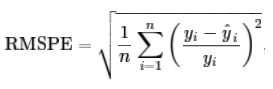

#Business Constraints



1.  *There are no strict latency constraints.*
2.   *Incorrect forecasts could result in inventory mismanagement and resource allocation.*



#Library Imports

In [1]:
import pandas as pd # Read Data
import numpy as np # Scientific computations
import math
import matplotlib.pyplot as plt # Plotting
import plotly.express as px
import seaborn as sns # Plotting
import sklearn # Model building
import warnings
warnings.filterwarnings('ignore')
# from statsmodels.tsa.stattools import adfuller

#Load Dataset from Kaggle

*Upload kaggle.json and using Kaggle API, upload the dataset to the Notebook*

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=09c0f8c5b3ea0919f26cf3c94df50120796ca8f50a1de55ca0e6bfb207ec9551
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
! mkdir ~/.kaggle # /content

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download rossmann-store-sales

 72% 5.00M/6.99M [00:00<00:00, 47.6MB/s]
100% 6.99M/6.99M [00:00<00:00, 49.9MB/s]


In [8]:
!unzip "/content/rossmann-store-sales.zip" -d "/content/dataset/"

Archive:  /content/rossmann-store-sales.zip
  inflating: /content/dataset/sample_submission.csv  
  inflating: /content/dataset/store.csv  
  inflating: /content/dataset/test.csv  
  inflating: /content/dataset/train.csv  


## Load Dataset

## Train Dataset

*Let's load the train data*

In [9]:
train_data = pd.read_csv('/content/dataset/train.csv',parse_dates=['Date'],squeeze=True, low_memory=False)
# Pandas read_csv low_memory and dtype options : https://stackoverflow.com/a/27232309
train_data.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

**Observation:** *From the data we understood, 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'DayOfWeek' are categorical features where as 'Sales', 'Customers','Store' are continous features.*

*Let's find some info about the train_data like data types of features etc.*

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


*Find the number of records and features in the train dataset*

In [11]:
print(f'Number of records in train_data : {train_data.shape[0]}')
print(f'Number of features in train_data : {train_data.shape[1]}')
print(f'List of features in train_data : {list(train_data.columns)}')

Number of records in train_data : 1017209
Number of features in train_data : 9
List of features in train_data : ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


**Observation:** 10,17,209 records in the train dataset with 9 features.

*Given train data has Date feauture so find the duration of dates.*

In [12]:
print(f'train_data contains data from {min(train_data.Date).date()} to \
{max(train_data.Date).date()} with a total of \
{(max(train_data.Date).date() - min(train_data.Date).date()).days +1 } days')

train_data contains data from 2013-01-01 to 2015-07-31 with a total of 942 days


**Observation:** This dataset contains data for about 2 years and 7 months

## Data Mapping for Categorical features

*To make the data look more understandable we are mapping the categorical to better named features.*

In [13]:
train_data_copy = train_data.copy(deep=True)

In [14]:
open_dict = {0:'No',1:'Yes'}
promo_dict = {0:'No',1:'Yes'}
school_holiday_dict = {0:'No',1:'Yes'}
state_holiday_dict = {0:'No','0':'No','a':'Yes','b':'Yes','c':'Yes'}
days_dict = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}

train_data.replace(to_replace={'Open':open_dict,'DayOfWeek':days_dict,'Promo':promo_dict,'SchoolHoliday':school_holiday_dict,'StateHoliday':state_holiday_dict}, inplace=True)

*Display the top 5 records from the train dataset*

In [15]:
train_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1       Fri 2015-07-31   5263        555  Yes   Yes           No   
1      2       Fri 2015-07-31   6064        625  Yes   Yes           No   
2      3       Fri 2015-07-31   8314        821  Yes   Yes           No   
3      4       Fri 2015-07-31  13995       1498  Yes   Yes           No   
4      5       Fri 2015-07-31   4822        559  Yes   Yes           No   

  SchoolHoliday  
0           Yes  
1           Yes  
2           Yes  
3           Yes  
4           Yes

*This makes the data more understandable.*

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  object        
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  object        
 6   Promo          1017209 non-null  object        
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 69.8+ MB


**Observation:** Note that the all the categorical features' Dtype is now '***object***'

*Let's explore some statistics for the numerical features available in the train dataset*

In [17]:
train_data.describe()
# You can look for only 'int' datatype

Store         Sales     Customers
count  1.017209e+06  1.017209e+06  1.017209e+06
mean   5.584297e+02  5.773819e+03  6.331459e+02
std    3.219087e+02  3.849926e+03  4.644117e+02
min    1.000000e+00  0.000000e+00  0.000000e+00
25%    2.800000e+02  3.727000e+03  4.050000e+02
50%    5.580000e+02  5.744000e+03  6.090000e+02
75%    8.380000e+02  7.856000e+03  8.370000e+02
max    1.115000e+03  4.155100e+04  7.388000e+03

**Observation:** 

* *Store is ID of the store which ranges from 1 to 1115*
* *When we observe the mean and median of other features Sales and Customers, they seem to be very close which indicates that there seems to be no impact of outliers.*

## Extract Time features from the 'Date' feature of train_data

*As we have Date as one feature we can extract more features from it like week of the year, day of the month/year which will help us in analysing in different time ranges.*

In [18]:
train_data['day'] = train_data['Date'].dt.day
train_data['dayOfYear'] = train_data['Date'].dt.dayofyear
train_data['week'] = train_data['Date'].dt.isocalendar().week
train_data['month'] = train_data['Date'].dt.month
train_data['quarter'] = train_data['Date'].dt.quarter
train_data['year'] = train_data['Date'].dt.year
train_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1       Fri 2015-07-31   5263        555  Yes   Yes           No   
1      2       Fri 2015-07-31   6064        625  Yes   Yes           No   
2      3       Fri 2015-07-31   8314        821  Yes   Yes           No   
3      4       Fri 2015-07-31  13995       1498  Yes   Yes           No   
4      5       Fri 2015-07-31   4822        559  Yes   Yes           No   

  SchoolHoliday  day  dayOfYear  week  month  quarter  year  
0           Yes   31        212    31      7        3  2015  
1           Yes   31        212    31      7        3  2015  
2           Yes   31        212    31      7        3  2015  
3           Yes   31        212    31      7        3  2015  
4           Yes   31        212    31      7        3  2015

**Observation:** *We have added 6 more columns to the train_data. This makes it a total of 13 features.*

## Store Dataset

*Let's load the store data as well. This has information related to store.*

In [19]:
store_data = pd.read_csv('/content/dataset/store.csv')
store_data.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [20]:
len(train_data['Store'].unique())
# Number of unique stores == number of records in store_data

1115

In [21]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Observation:** From the above it is obvious that 'StoreType', 'Assortment' and 'PromoInterval' are categorical features.

*Find the number of records and features in Store dataset.*

In [22]:
print(f'Number of records in store_data : {store_data.shape[0]}')
print(f'Number of features in store_data : {store_data.shape[1]}')
print(f'List of features in store_data : {list(store_data.columns)}')

Number of records in store_data : 1115
Number of features in store_data : 10
List of features in store_data : ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [23]:
store_data.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

**CompetitionOpenSinceMonth :** Have values 1 (Jan) to 12 (Dec)

**CompetitionOpenSinceYear :** Have value of year when competition has started

**Promo2 :** Have Yes (1) or No  (0)

**Promo2SinceWeek :** Have values from 1 to 52

**Promo2SinceYear :** Have value of year when Promo2 has started

In [24]:
store_data['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [25]:
store_data.replace(to_replace={'Promo2':promo_dict}, inplace=True)

## Merge Datasets

*Let's merge train and store datasets. 'Store' is the common feature in both the train and store datasets.*

In [26]:
train_store_data = pd.merge(train_data, store_data, how='left', on ='Store')
train_store_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1       Fri 2015-07-31   5263        555  Yes   Yes           No   
1      2       Fri 2015-07-31   6064        625  Yes   Yes           No   
2      3       Fri 2015-07-31   8314        821  Yes   Yes           No   
3      4       Fri 2015-07-31  13995       1498  Yes   Yes           No   
4      5       Fri 2015-07-31   4822        559  Yes   Yes           No   

  SchoolHoliday  day  ...  year  StoreType  Assortment  CompetitionDistance  \
0           Yes   31  ...  2015          c           a               1270.0   
1           Yes   31  ...  2015          a           a                570.0   
2           Yes   31  ...  2015          a           a              14130.0   
3           Yes   31  ...  2015          c           c                620.0   
4           Yes   31  ...  2015          a           a              29910.0   

   CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  Promo2SinceWeek  \
0                        9.0                   2008.0     No              NaN   
1                       11.0                   2007.0    Yes             13.0   
2                       12.0                   2006.0    Yes             14.0   
3                        9.0                   2009.0     No              NaN   
4                        4.0                   2015.0     No              NaN   

   Promo2SinceYear    PromoInterval  
0              NaN              NaN  
1           2010.0  Jan,Apr,Jul,Oct  
2           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN  
4              NaN              NaN  

[5 rows x 24 columns]

In [27]:
train_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  object        
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  object        
 6   Promo                      1017209 non-null  object        
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  object        
 9   day                        1017209 non-null  int64         
 10  dayOfYear                  1017209 non-null  int64         
 11  week                       1017209 no

*Find the total number of features in the merged dataset*

In [28]:
len(list(train_store_data.columns))

24

**Observation:** *Now we have a total of 24 features in the merged dataset.*

*As we are ready with the data, let's ask some questions about the data that will help us to get an understanding on the performance of the stores over 942 days.*

*Now that we have the data, let's explore each feature and also see how each feature is contributing to target feature which is Sales.*

#Exploratory Data Analysis

#Univariate Analysis

##1. Continuous features

In [ ]:
def distribution_plot(feature):
    plt.figure(figsize=(13,3))
    sns.distplot(train_store_data[feature])
    plt.title(f'Distribution plot of {feature}')
    plt.axvline(train_store_data[feature].median(), c='g',ls='--',lw=2.5,label='median')
    plt.axvline(train_store_data[feature].mean(), c='r',ls='--',lw=2.5,label='mean')
    plt.legend()
    plt.show()

###1.1 Sales

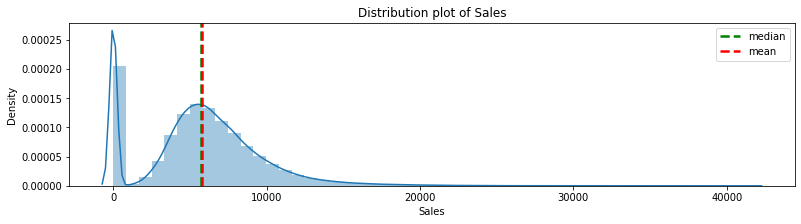

In [ ]:
distribution_plot('Sales')

**Observation:** 
* *There are some stores that made no sales. Probably either the stores are closed on that day or no luck.*
* *Mean and median of sales is almost same which indicates that there is not much impact of outlier sales.*
* *This distribution looks more like a tweedie distribution with many non-negative values at zero.*

###1.2 Competition Distance

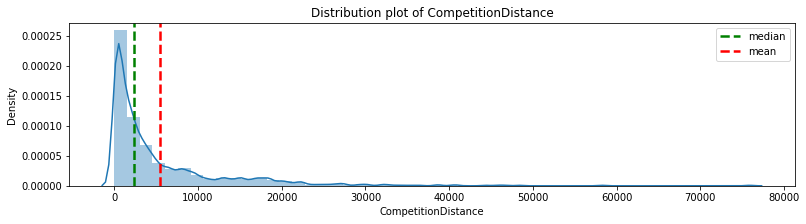

In [ ]:
distribution_plot('CompetitionDistance')
# sns.displot(train_store_data['CompetitionDistance'], kind='kde')

**Observation:** 
* *Most of the competitive stores are nearby the retail giant.*
* *There are some competitive stores which are much far-off from retail store, that must be the reason why mean and median varied a lot.*

###1.3 Customers

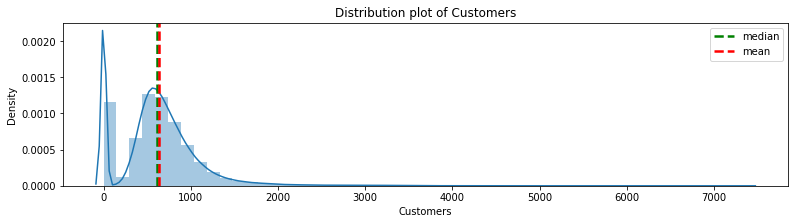

In [ ]:
distribution_plot('Customers')

**Observation:** 
* *There are some days when no customers visited a store. This could have happened either when the stores are closed or customers might not have visited even when it is open.*
* *Mean and median of number of customers who visited a store is almost same which indicates that there is not much impact of outlier customers.*
* *Like Sales, this also looks like a tweedie distribution.*

###1.4 CompetitionOpenSinceMonth

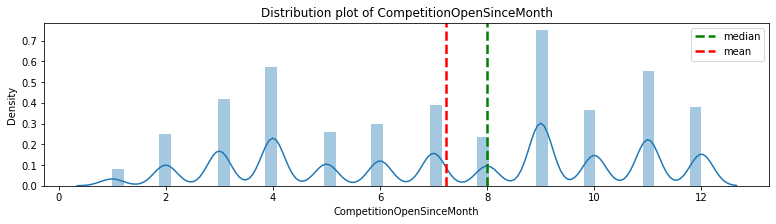

In [ ]:
distribution_plot('CompetitionOpenSinceMonth')

**Observation:** *From the given data, we understand that most competitive stores have started in the September month(9). That actually makes sense because Oct-Dec quarter sees increased sales and probably they want to cash in the trend.*

###1.5 CompetitionOpenSinceYear

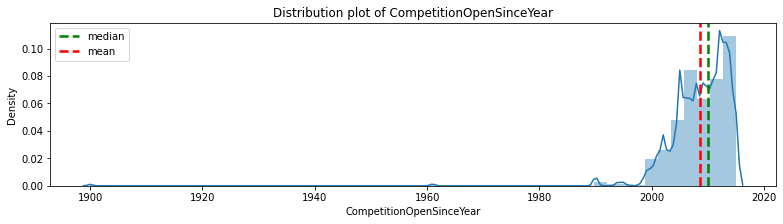

In [ ]:
distribution_plot('CompetitionOpenSinceYear')

**Observation:** *With years, competition has been growing for this retail giant.*

###1.6 Promo2SinceYear

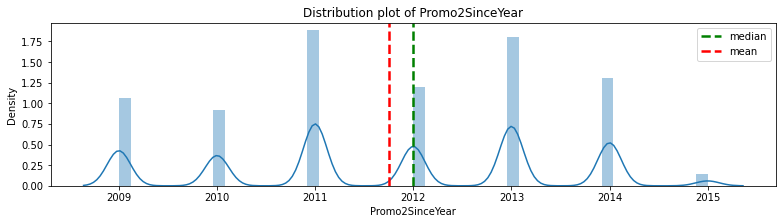

In [ ]:
distribution_plot('Promo2SinceYear')

###1.7 Promo2SinceWeek

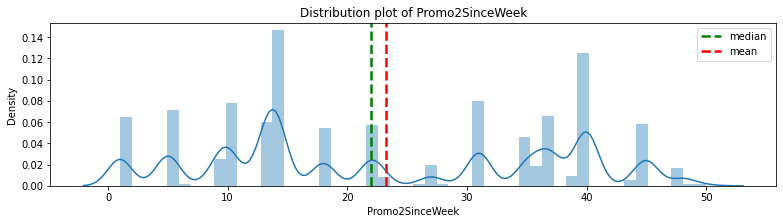

In [ ]:
distribution_plot('Promo2SinceWeek')

**Observation:** *Most promo2s have started in the 15th and 40th week of the year.*

##Categorical Features

###Distribution of Categorical features

In [ ]:
def categorical_distribution(categorical_var):
    num_plots = len(categorical_var)
    total_cols = 4
    total_rows = num_plots//total_cols
    fig, axs = plt.subplots(nrows=total_rows,ncols=total_cols, figsize=(4*total_cols,4*total_rows), constrained_layout=True)
    for i, var in enumerate(categorical_var):
        row = i//total_cols
        pos = i % total_cols
        if var =='DayOfWeek':
            order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
        elif var in ['SchoolHoliday', 'StateHoliday', 'Promo', 'Promo2', 'Open']:
            order =['Yes','No']
        elif var =='Assortment':
            order = ['a','b','c']
        elif var =='StoreType':
            order = ['a','b','c','d']
        else:   
            order = None
        plot = sns.countplot(x=var, data=train_store_data, order=order,ax=axs[row][pos])
        fig.suptitle(f'Distribution of Categorical features')

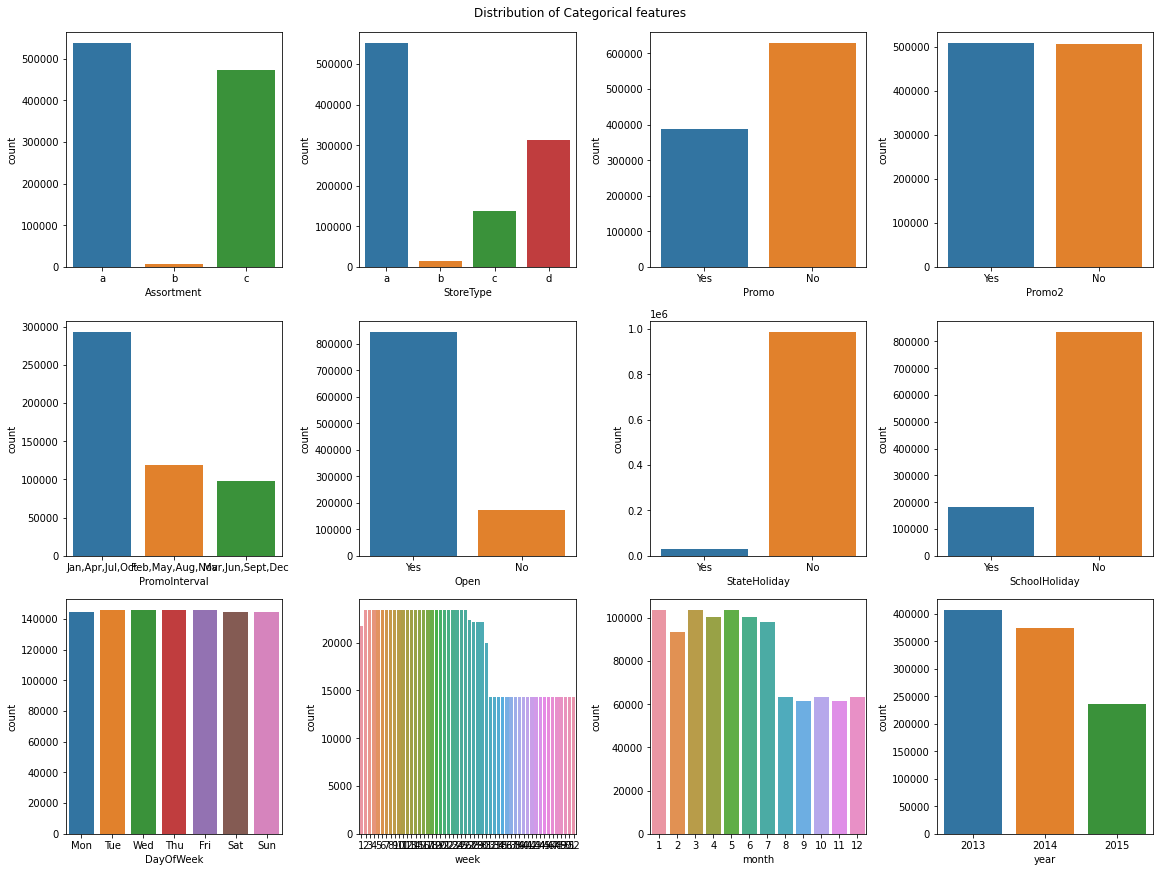

In [ ]:
categorical_distribution(['Assortment','StoreType','Promo','Promo2','PromoInterval','Open','StateHoliday','SchoolHoliday','DayOfWeek','week','month','year'])

**Observation:** 
* *Given data has quite imbalance in Assortment and StoreType. Assortment 'b' and StoreType 'b' are quite less compared to others.*
* *It is surprising to note that the Promo2 seems to be a more offered one throughout the year than Promo.*
* *More promo2s in the first quarter.*
* *It is quite obvious that there will be less school holidays and state holidays compared to working days.*
* *Also the same with number of days stores are opened.*
* *DayOfWeek have almost equal distribution of categories.*
* *Imbalance in time related features is because of the fact that we have 2 years 7 months data.* 

## Bivariate Analysis

In [ ]:
def bivariate_analysis_categorical(feature, target1, target2):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharey=False, sharex=True,constrained_layout=True)
    if feature == 'DayOfWeek':
        order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    elif feature in ['SchoolHoliday', 'StateHoliday', 'Promo','Promo2','Open']:
        order = ['Yes','No']
    elif feature == 'Assortment':
        order = ['a','b','c']
    elif feature == 'StoreType':
        order = ['a','b','c','d']
    else:
        order = None
    ax0 = sns.barplot(x=feature, y=target1, data=train_store_data,order=order,ax=axes[0][0])
    ax1 = sns.boxplot(x=feature, y=target1, data=train_store_data,order=order,ax=axes[0][1])
    ax2 = sns.violinplot(x=feature, y=target1, data=train_store_data,order=order,ax=axes[0][2])
    ax3 = sns.barplot(x=feature, y=target2, data=train_store_data,order=order,ax=axes[1][0])
    ax4 = sns.boxplot(x=feature, y=target2, data=train_store_data,order=order,ax=axes[1][1])
    ax5 = sns.violinplot(x=feature, y=target2, data=train_store_data,order=order,ax=axes[1][2])
    fig.suptitle(f'How Sales and Customers features vary with {feature}')
    # plt.tight_layout()
    # https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
    if feature == 'PromoInterval':
        for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

###1.1 Open

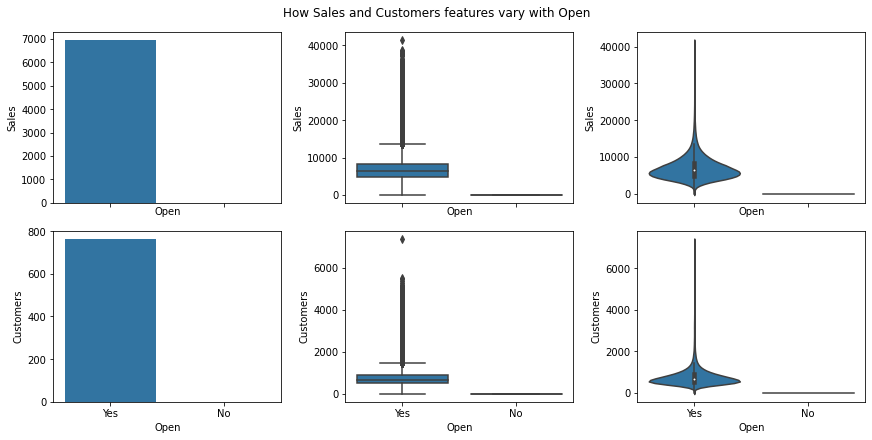

In [ ]:
bivariate_analysis_categorical('Open', 'Sales','Customers')

**Observation:** *Obviously no Sales when stores are closed.*

###1.2 DayOfWeek

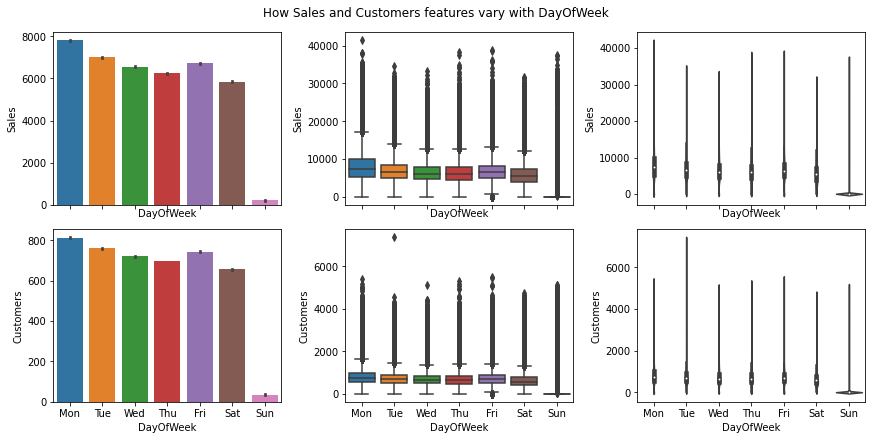

In [ ]:
bivariate_analysis_categorical('DayOfWeek', 'Sales','Customers')
# https://stackoverflow.com/questions/69249666/set-a-title-for-multiple-subplots-in-matplotlib
# https://stackoverflow.com/questions/6963035/pyplot-common-axes-labels-for-subplots

**Observation:** 
* *Mondays recorded high sales (median from boxplot) probably because most stores are closed on Sundays.*
* *Fridays recorded second highest sales probably because consumers made purchases keeping in mind that there would be Promotional offers for the next 2 days.*

*Violin plot is not that visible so let's draw the distributions seperately.*

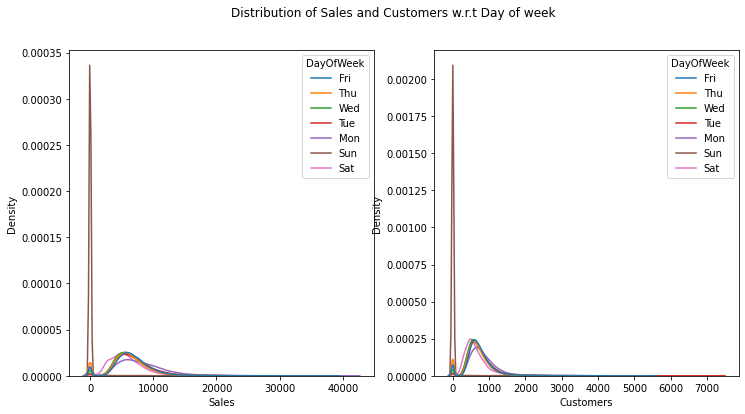

In [ ]:
# Matplotlib with a single subplot: https://stackoverflow.com/a/61838853; Use squeeze parameter
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6),squeeze=False)
ax0 = sns.kdeplot(data= train_store_data,x='Sales',hue='DayOfWeek',ax=axes[0][0])
ax1 = sns.kdeplot(x='Customers',data= train_store_data,hue='DayOfWeek',ax=axes[0][1])
fig.suptitle(f'Distribution of Sales and Customers w.r.t Day of week')
plt.show()

###1.3 Promo

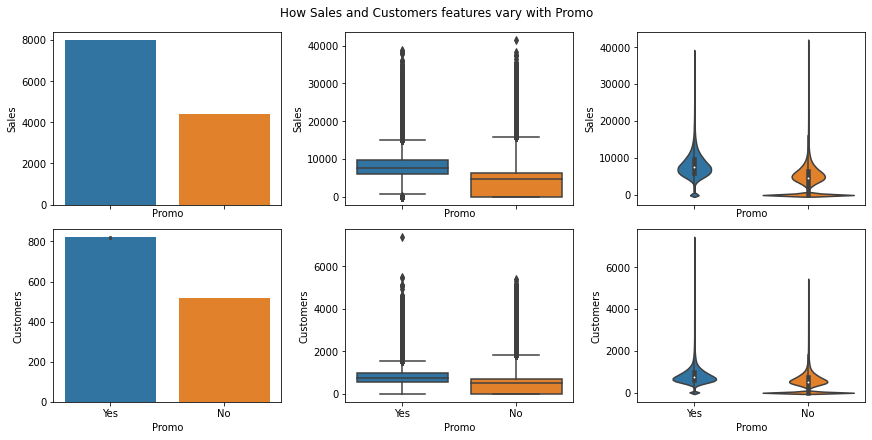

In [ ]:
bivariate_analysis_categorical('Promo', 'Sales','Customers')

**Observation:** 
* *It is very clear from the data Promotional offers helped in improving Sales and drawing in customers.*
* *It is interesting to note from the violin plots that both sales and customers visited are around zero when promotions are not offered.*

###1.4 StateHoliday

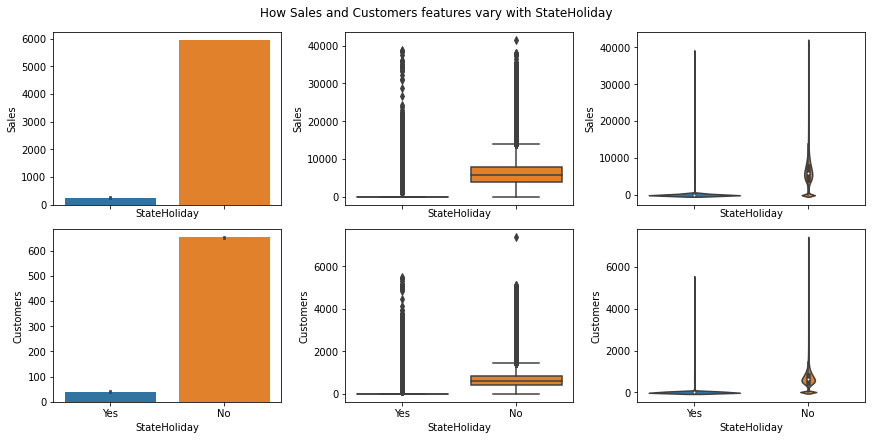

In [ ]:
bivariate_analysis_categorical('StateHoliday', 'Sales','Customers')

**Observation:** *Sales on a State Holiday are too low owing to the fact that most stores are closed on State Holiday.*

###1.5 SchoolHoliday

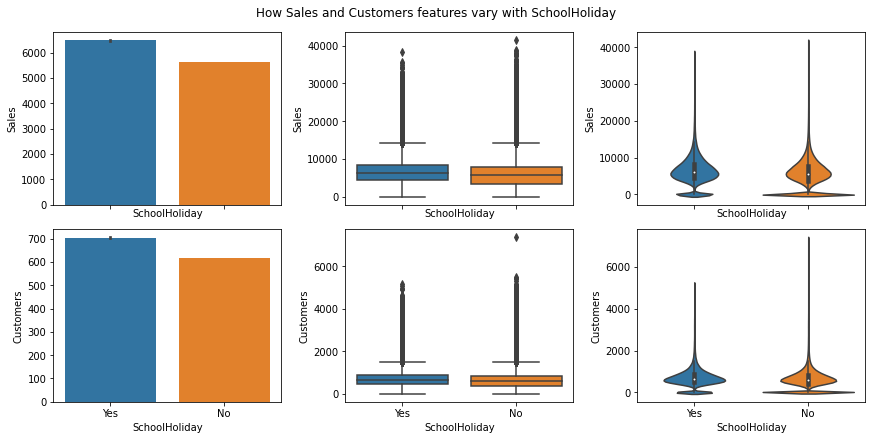

In [ ]:
bivariate_analysis_categorical('SchoolHoliday', 'Sales','Customers')

**Observation:** 
* *Unlike State Holiday, School holidays brought in more customers eventually in making more sales.*
* *There are less school holidays for stores compared to the working days(which will be verified shortly), yet sales made on school holidays are more.*

###1.6 StoreType

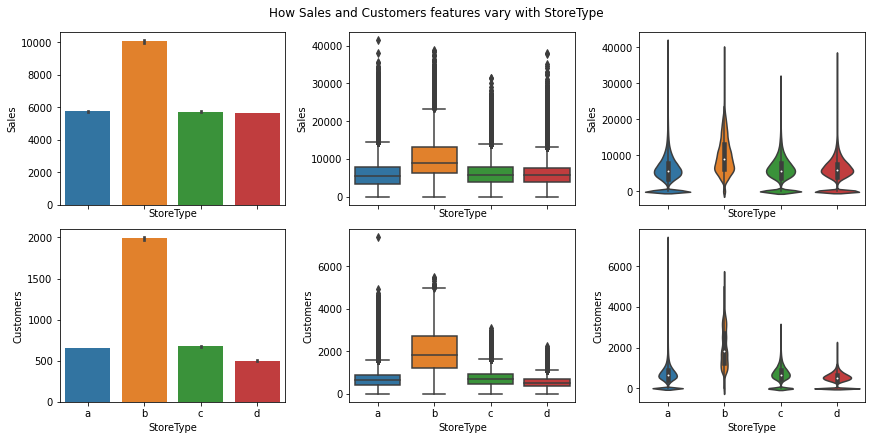

In [ ]:
bivariate_analysis_categorical('StoreType', 'Sales','Customers')

**Observation:** 
* *Store type B made more sales compared to the rest.*
* *This comes across as surprising as the number of 'b' store types are quite less. We can make a safe guess that probably increasing 'b' type stores will result in improved sales.*

###1.7 Assortment

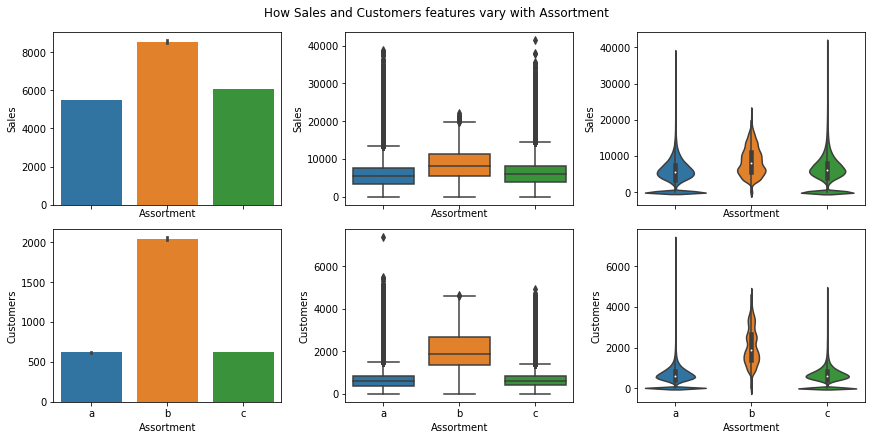

In [ ]:
bivariate_analysis_categorical('Assortment', 'Sales','Customers')

**Observation:** 
* *Assortment B made more sales compared to the rest.*
* *This comes across as surprising as the number of 'b' assortments are quite less. We can make a safe guess that probably increasing 'b' assortments will result in improved sales.*

###1.8 Promo2

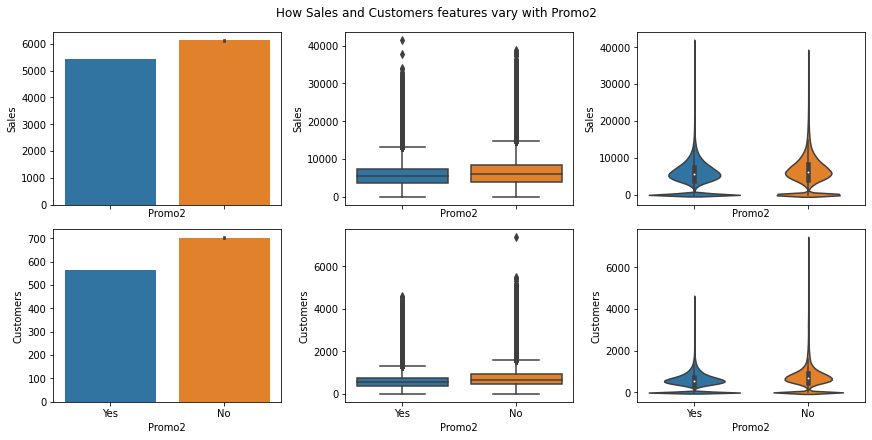

In [ ]:
bivariate_analysis_categorical('Promo2', 'Sales','Customers')

**Observation:** *Unlike Promos, Promo2 did not help much.Also note that Promo2 is offered for almost half of the year.*

###PromoInterval

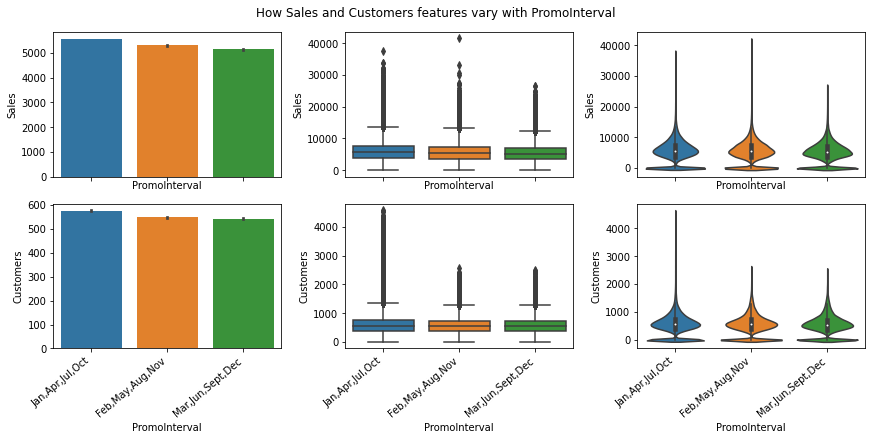

In [ ]:
bivariate_analysis_categorical('PromoInterval', 'Sales','Customers')

**Observation:** 
* *PromoInterval is distributed equally and sales, customers are almost same for all the intervals.*

###1.9 Month

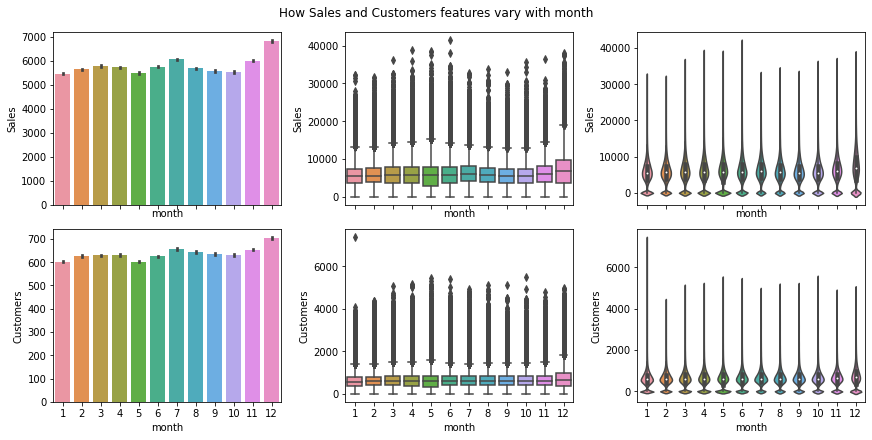

In [ ]:
bivariate_analysis_categorical('month', 'Sales','Customers')

**Observation:** 
* *There was an increase in Sales from october to December and from there Sales saw a dip and went consistent(Observed from the medians).*
* *This could have been proved more confidently if Aug-Dec,2015 data were provided*

###1.10 Quarter

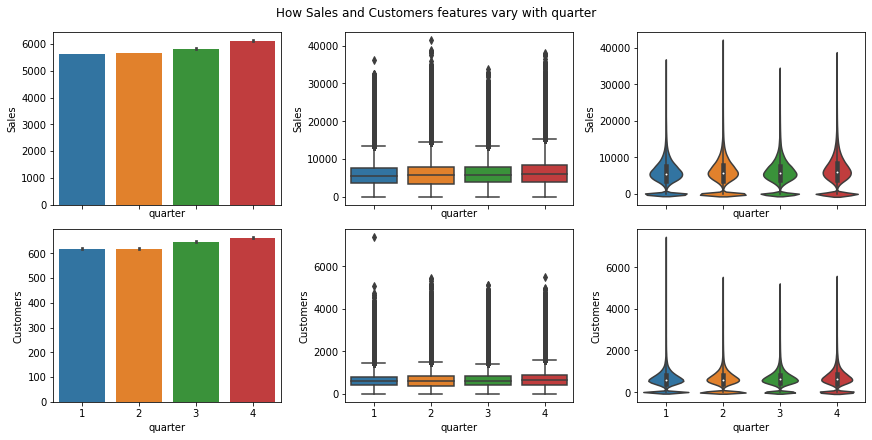

In [ ]:
bivariate_analysis_categorical('quarter', 'Sales','Customers')

**Observation:**
* *Despite the fact that we have one quarter(Q4) missing data, Q4 seems to be dominating the rest.*

###1.10 Year

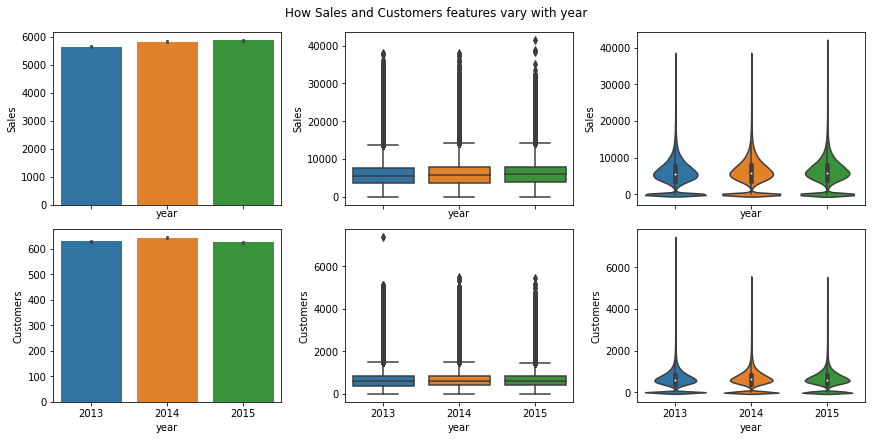

In [ ]:
bivariate_analysis_categorical('year', 'Sales','Customers')

**Observation:** *Acknowledging the fact that we have only 7 months of data for 2015 and the best is yet to happen in Oct-Dec Quarter, 2015 has recorded good sales compared to the previous year.*

###1.11 Day in a month

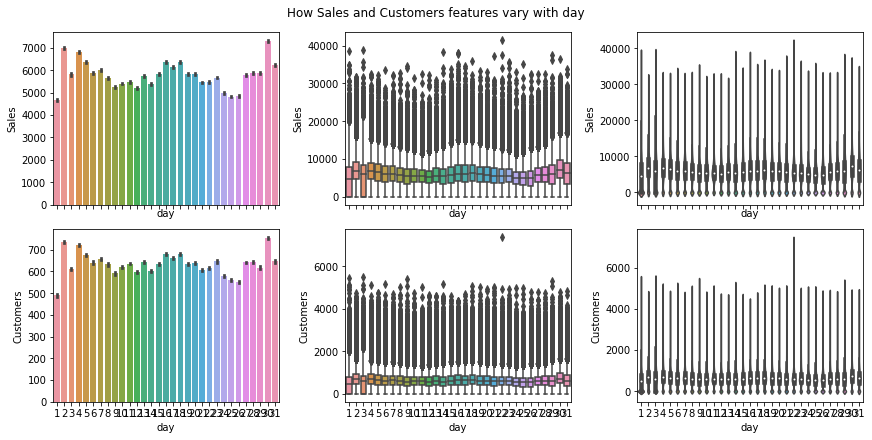

In [ ]:
bivariate_analysis_categorical('day', 'Sales','Customers')

**Observation:**
* *First day of months seems not that great for stores, that is probably because of the good sales being made in the last 4 or 5 days of every month.*

# Bivariate Analysis of Categorical Features in One plot

*A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars*

http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot

In [ ]:
def categorical_eda(categorical_var, target):
    num_plots = len(categorical_var)
    total_cols = 4
    total_rows = num_plots//total_cols
    fig, axs = plt.subplots(nrows=total_rows,ncols=total_cols, figsize=(4*total_cols,4*total_rows), constrained_layout=True)
    for i, var in enumerate(categorical_var):
        row = i//total_cols
        pos = i % total_cols
        if var =='DayOfWeek':
            order = ['Mon','Tue','Wed','Thu','Fri','Sat']
        elif var in ['SchoolHoliday', 'StateHoliday', 'Promo', 'Promo2', 'Open']:
            order =['Yes','No']
        elif var =='Assortment':
            order = ['a','b','c']
        elif var =='StoreType':
            order = ['a','b','c','d']
        else:   
            order = None
        # plot = sns.barplot(x=var, y=target, data=train_store_data, order=order,ax=axs[row][pos])
        ax = sns.barplot(x=var, y=target, data=train_store_data, order=order,ax=axs[row][pos])

        # for idx, label in enumerate(list(train_store_data.index)): # a,b,c,d
        #     value = np.round(train_store_data.iloc[idx],decimals=2)
        #     ax.annotate(value,(idx, value), xytext=(0, 1),textcoords='offset pixels')
        #     # https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
        # plt.legend()       
        fig.suptitle(f'How Sales and Customers features vary with Categorical features')
        # https://www.delftstack.com/howto/seaborn/legend-seaborn-plot/

**With respect to Sales**

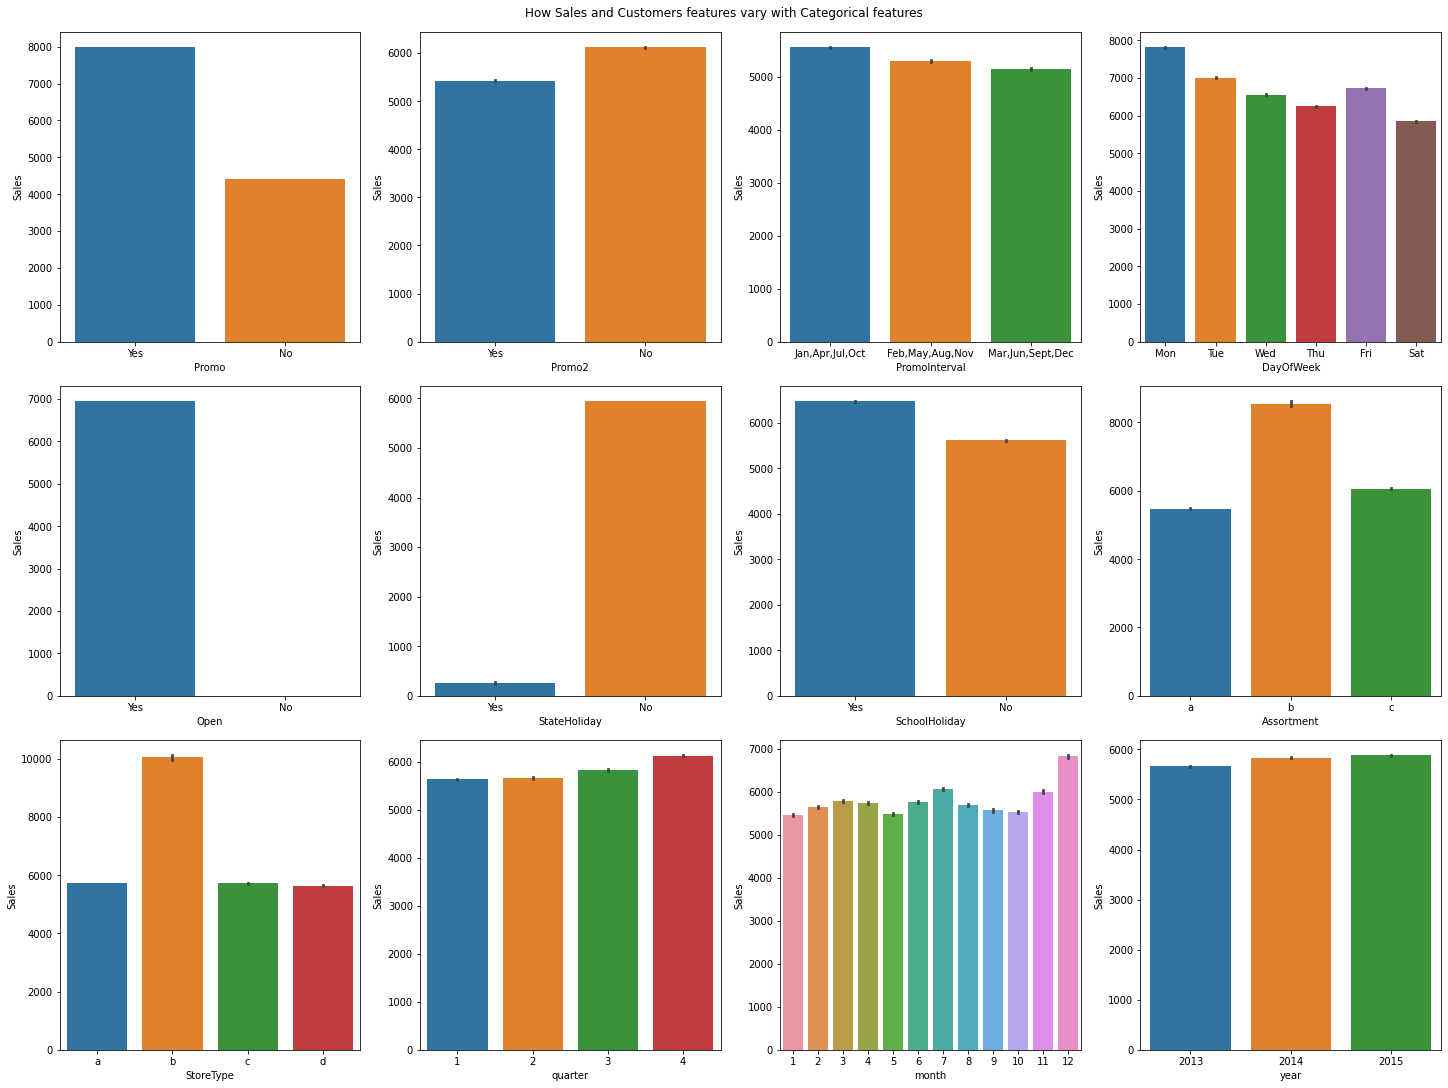

In [ ]:
categorical_eda(['Promo','Promo2','PromoInterval','DayOfWeek','Open','StateHoliday','SchoolHoliday','Assortment','StoreType','quarter','month','year'],'Sales')

**With respect to customers**

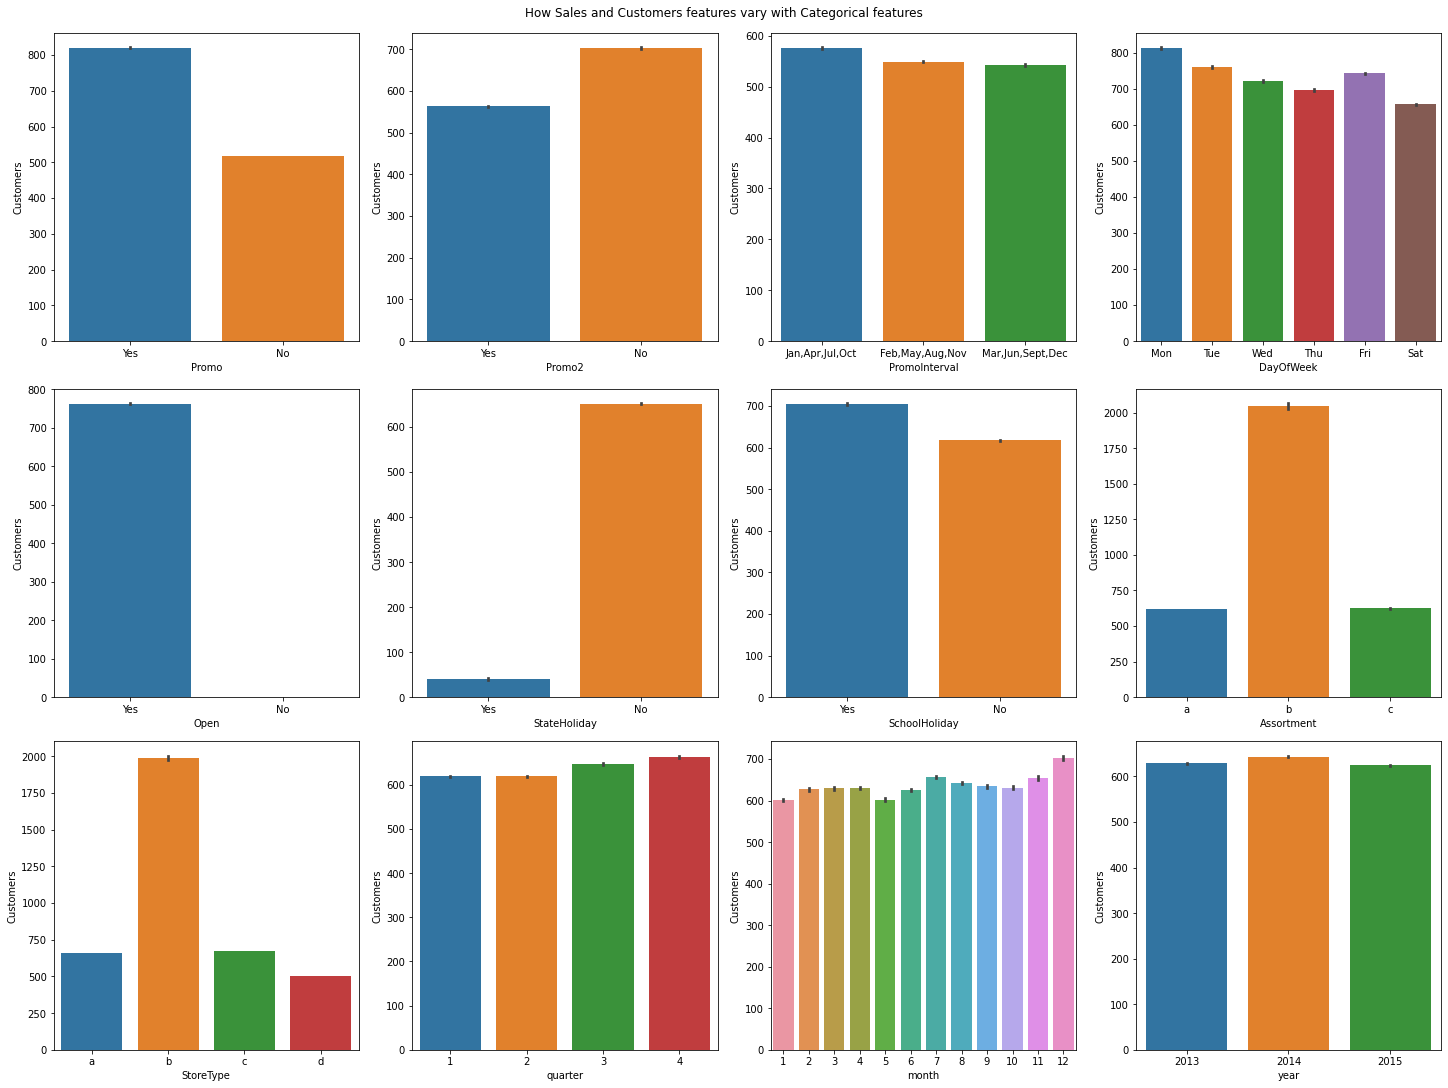

In [ ]:
# categorical_eda(['StateHoliday','SchoolHoliday','Assortment','StoreType'],'Customers')
categorical_eda(['Promo','Promo2','PromoInterval','DayOfWeek','Open','StateHoliday','SchoolHoliday','Assortment','StoreType','quarter','month','year'],'Customers')

*The above two plots are already explained individually.*

In [28]:
def sales_distribution(categorical_var):
    num_plots = len(categorical_var)
    total_cols = 4
    total_rows = num_plots//total_cols
    fig, axs = plt.subplots(nrows=total_rows,ncols=total_cols, figsize=(5*total_cols,5*total_rows), constrained_layout=True)
    for i, var in enumerate(categorical_var):
        row = i//total_cols
        pos = i % total_cols
        if var =='DayOfWeek':
            order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
        elif var in ['SchoolHoliday', 'StateHoliday', 'Promo', 'Promo2', 'Open']:
            order =['Yes','No']
        elif var =='Assortment':
            order = ['a','b','c']
        elif var =='StoreType':
            order = ['a','b','c','d']
        else:   
            order = None
        plot = sns.lineplot(x='dayOfYear',y='Sales',data=train_store_data,hue=var,markers=True,dashes=False,ax=axs[row][pos])
        fig.suptitle(f'How Sales vary with different features throughout the 365 days')

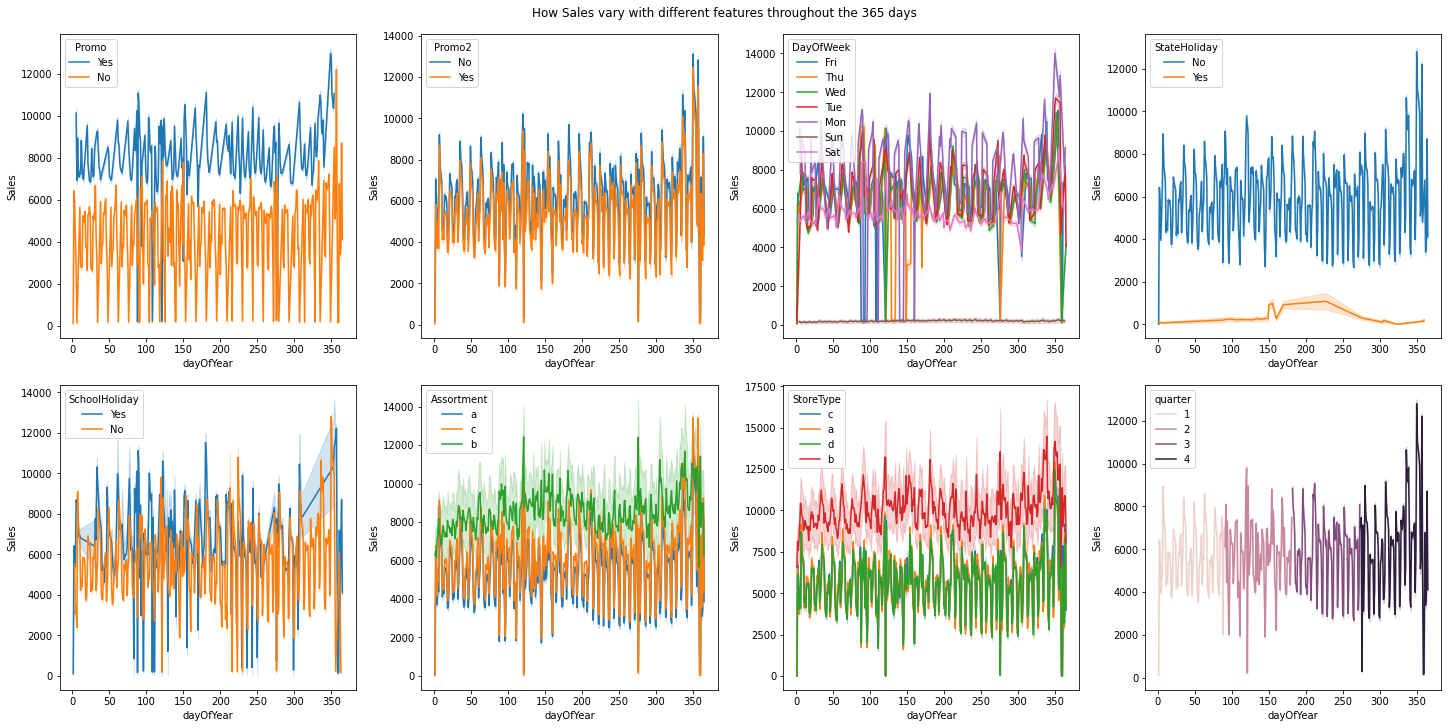

In [29]:
sales_distribution(['Promo','Promo2','DayOfWeek','StateHoliday','SchoolHoliday','Assortment','StoreType','quarter'])

*The above observations can be verified from this plot.*

###On what days of the week do most stores stay open?

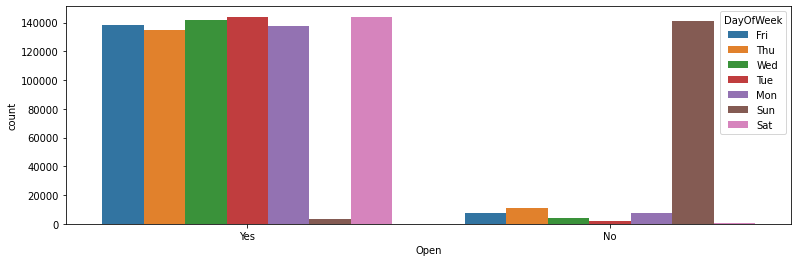

In [30]:
plt.figure(figsize=(13,4))
sns.countplot(x='Open', hue='DayOfWeek', data=train_store_data)
plt.show()

**Observation:** *Most stores are closed on Sundays.*

###What days of the month offered more promotional offers?

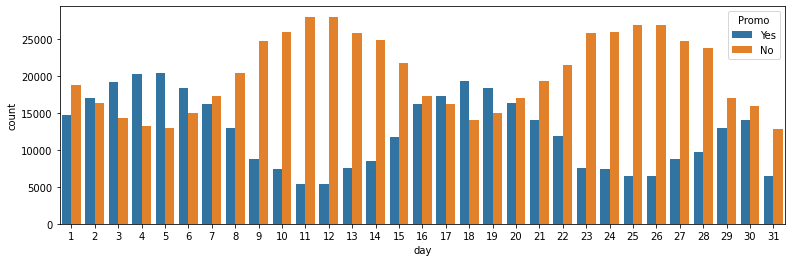

In [31]:
plt.figure(figsize=(13,4))
sns.countplot(x='day', hue='Promo', data=train_store_data)
plt.show()

**Observation:** *Notice the cycle in which promos are offered. More promotional offers are offered in first and third weeks.*

###What weeks of the year offered more promotional offers?

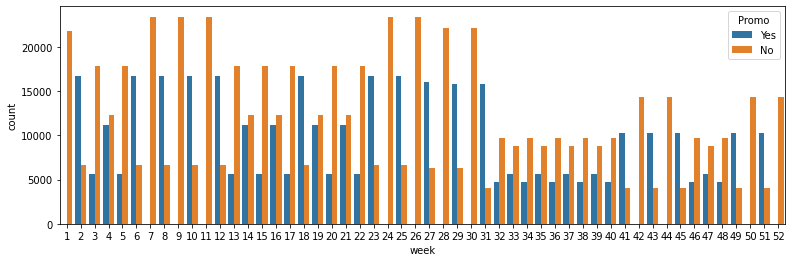

In [32]:
plt.figure(figsize=(13,4))
sns.countplot(x='week', hue='Promo', data=train_store_data)
plt.show()

**Observation:** *No promotional offers on first and last week of year. Also, we cannot take it for sure that there are less promotions in the second half of the year as the given data is for 2 years 7 months.*

#Multivariate Analysis

In [33]:
def multivariate_analysis_categorical(feature, target1, target2, hue):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,6), sharey=False, sharex=True,constrained_layout=True)
    if feature == 'DayOfWeek':
        order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    elif feature in ['SchoolHoliday', 'StateHoliday', 'Promo','Open']:
        order = ['Yes','No']
    elif feature == 'Assortment':
        order = ['a','b','c']
    elif feature == 'StoreType':
        order = ['a','b','c','d']
    else:
        order = None
    if hue == 'DayOfWeek':
        hue_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    elif hue in ['SchoolHoliday', 'StateHoliday', 'Promo','Open']:
        hue_order = ['Yes','No']
    elif hue == 'Assortment':
        hue_order = ['a','b','c']
    elif hue == 'StoreType':
        hue_order = ['a','b','c','d']
    else:
        order = None
    ax0 = sns.barplot(x=feature, y=target1, hue=hue, data=train_store_data,order=order,hue_order=hue_order,ax=axes[0][0], estimator=sum)
    ax1 = sns.boxplot(x=feature, y=target1, hue=hue, data=train_store_data,order=order,hue_order=hue_order,ax=axes[0][1])
    ax2 = sns.violinplot(x=feature, y=target1, hue=hue, data=train_store_data,order=order,hue_order=hue_order,ax=axes[0][2])
    ax3 = sns.barplot(x=feature, y=target2, hue=hue, data=train_store_data,order=order,hue_order=hue_order,ax=axes[1][0], estimator=sum)
    ax4 = sns.boxplot(x=feature, y=target2, hue=hue, data=train_store_data,order=order,hue_order=hue_order,ax=axes[1][1])
    ax5 = sns.violinplot(x=feature, y=target2, hue=hue, data=train_store_data,order=order,hue_order=hue_order,ax=axes[1][2])
    fig.suptitle(f'How Sales and Customers features vary with {feature}')
    plt.show()

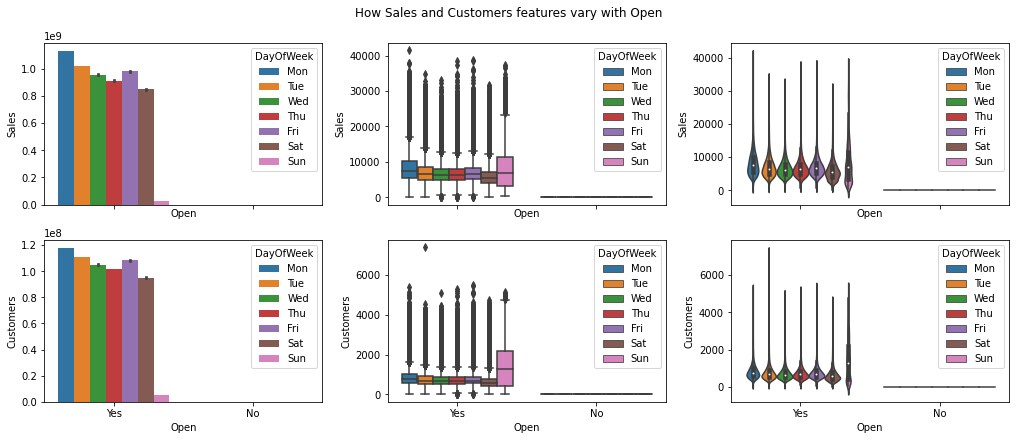

In [34]:
multivariate_analysis_categorical('Open', 'Sales', 'Customers', 'DayOfWeek')

###Does offering promotional offers on a particular day of the week helps?

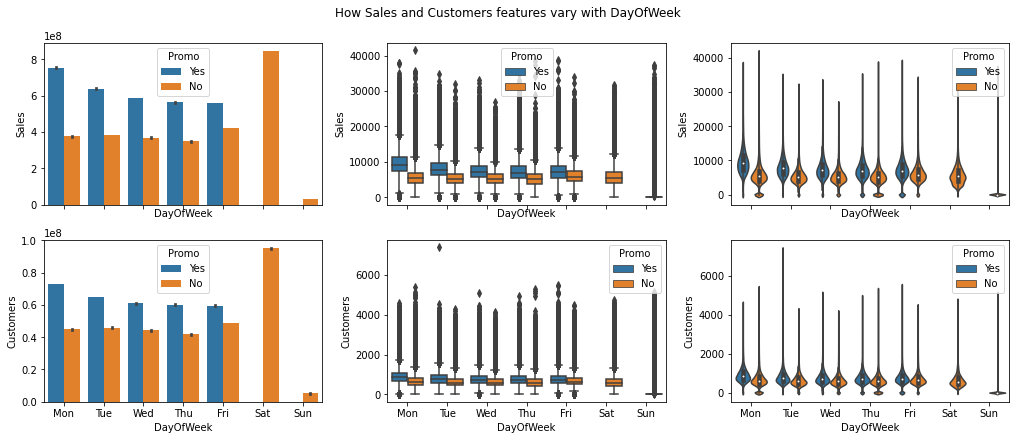

In [ ]:
multivariate_analysis_categorical('DayOfWeek', 'Sales', 'Customers', 'Promo')

**Observation:** 
* *On Saturdays and Sundays, stores do not offer Promos. Despite that Sales are good on Saturday, probably because of the reason that most of the stores would be closed the next day.*
* *Offering promotions on Mondays seems to be bringing in more cash.*

###Does school holiday falling on particular day of the week impact sales?

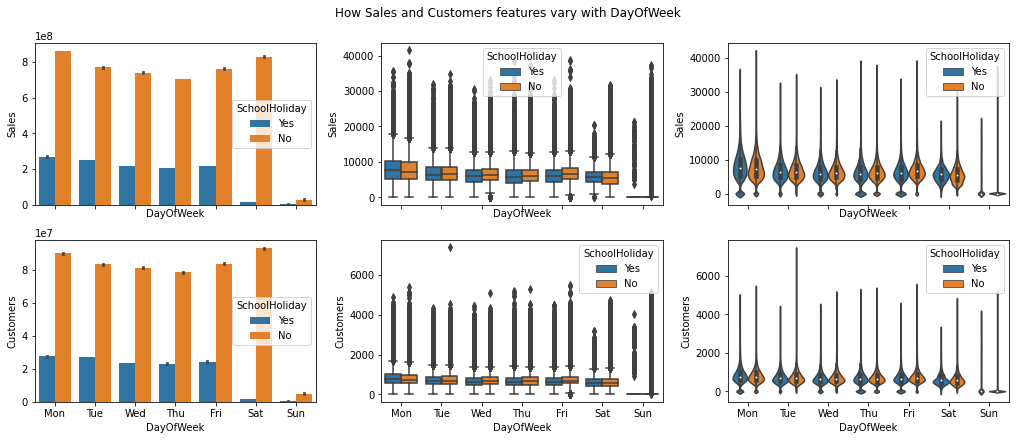

In [ ]:
multivariate_analysis_categorical('DayOfWeek', 'Sales', 'Customers', 'SchoolHoliday')

**Observation:** *Probably no, it made more sales on non-school holiday.*

### How days of the week impact sales of different Assortment types?

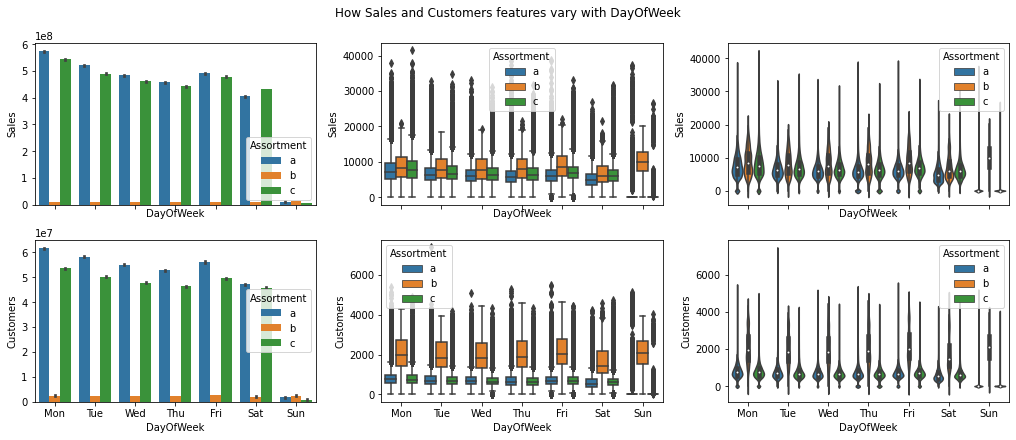

In [ ]:
multivariate_analysis_categorical('DayOfWeek', 'Sales', 'Customers', 'Assortment')

**Observation:** *Probably more B assortments are open on Sundays compared to the rest, this can be observed from median plot. Notice that median value of B assortments is more than any other store all throughout week, which means inspite of in less numbers, B assortments makes sales as good as other assortments.*

###How Sales and customers vary for different store type when they are open.

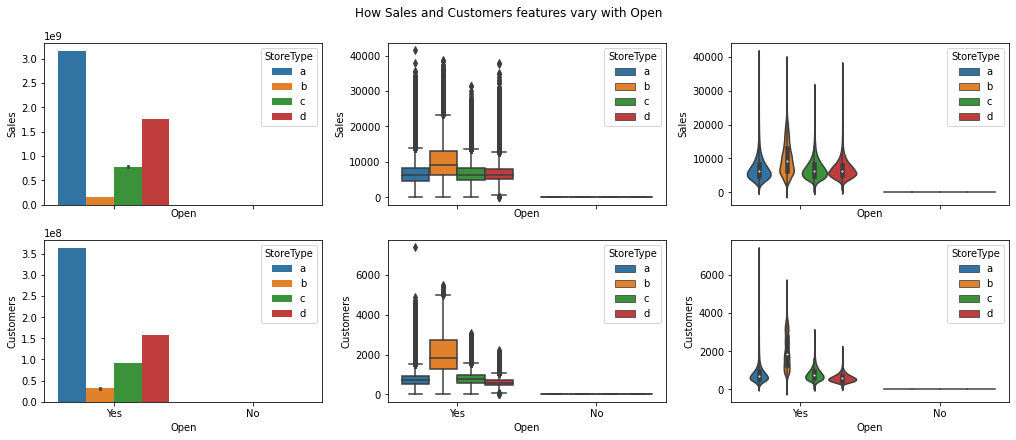

In [ ]:
multivariate_analysis_categorical('Open', 'Sales', 'Customers', 'StoreType')

### How days of the week impact sales of different store types?

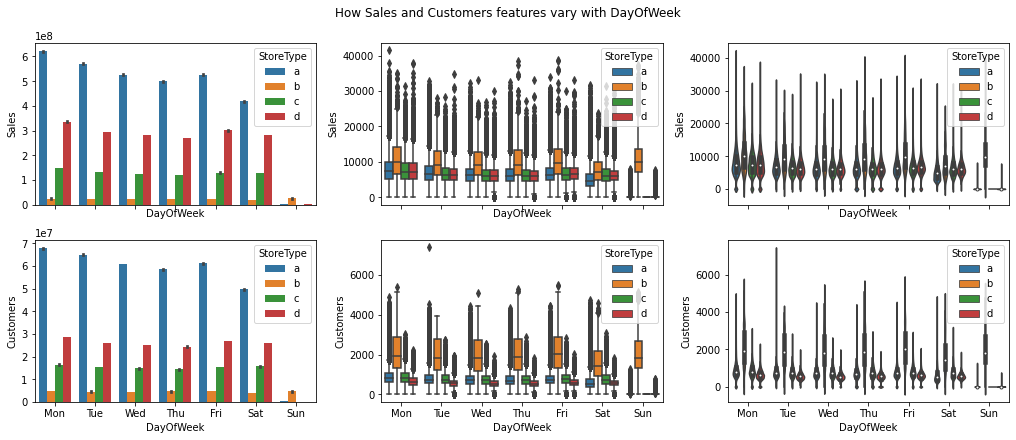

In [ ]:
multivariate_analysis_categorical('DayOfWeek', 'Sales', 'Customers', 'StoreType')

**Observation:** *Irrespective of days store type B makes good sales. Probably more B storetypes are open on Sundays compared to the rest, this can be observed from medians in boxplot.*

### What combination of store type and assortment makes more sales/brings more customers?

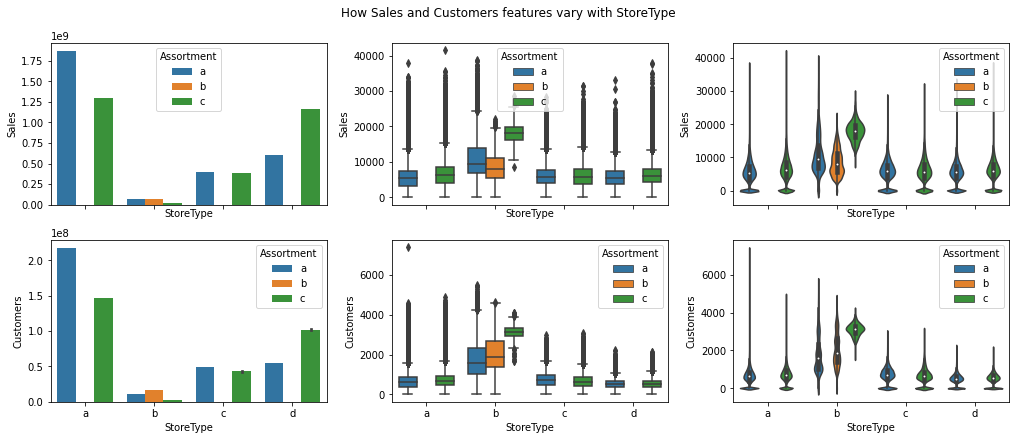

In [ ]:
multivariate_analysis_categorical('StoreType', 'Sales', 'Customers', 'Assortment')

**Observation:** 
* *Store type B and Assortment B makes more sales.*
* *Assortment B seems to co exist only with store type B.*

*The above statement can be verified below.*

In [71]:
train_store_data.groupby(['StoreType','Assortment'])['Open'].count()#.reset_index()

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Open, dtype: int64

###Impact of State holidays on sales over different days of the week

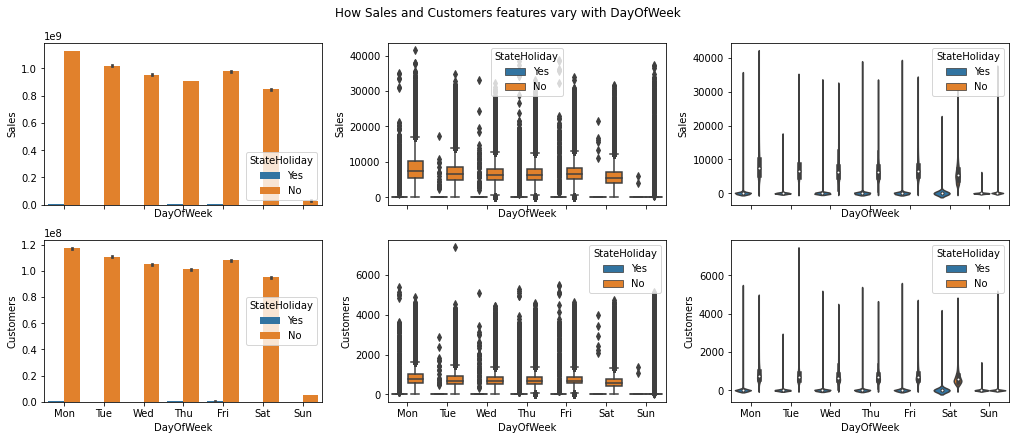

In [ ]:
multivariate_analysis_categorical('DayOfWeek', 'Sales', 'Customers', 'StateHoliday')

**Observation:** *As most of the stores are closed on Stateholiday, there are hardly any Sales.*

###Impact of promotional offers on sales of Assortments

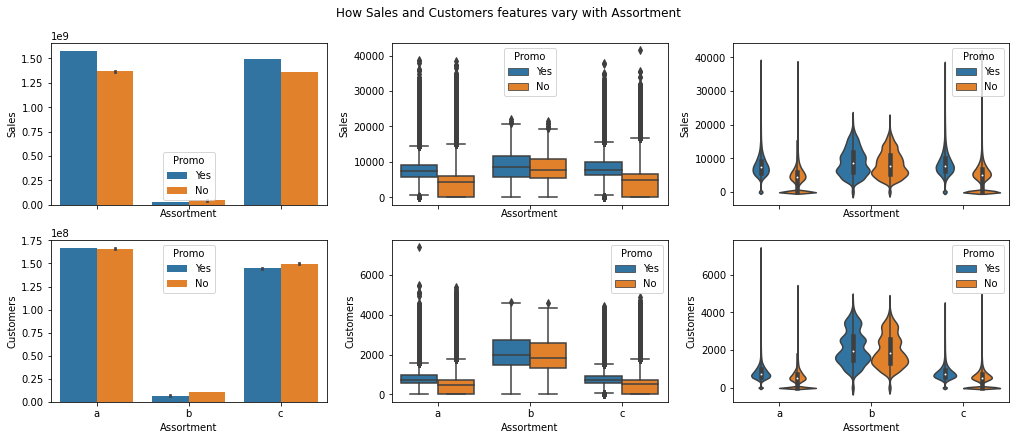

In [ ]:
multivariate_analysis_categorical('Assortment', 'Sales', 'Customers', 'Promo')

**Observation:** *Though promos offered had impact on improved sales, stores of b Assortment sales had a negilible impact*

###Impact of promotional offers on sales of Store types

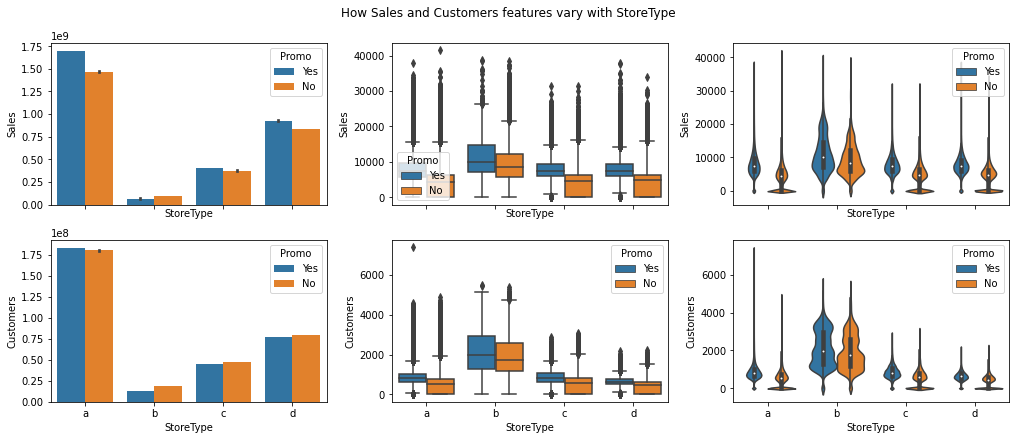

In [ ]:
multivariate_analysis_categorical('StoreType', 'Sales', 'Customers', 'Promo')

**Observation:** *Promos offered had impact on improved sales on all the store types.*

##Facet Plots

###What is the impact of Promotional offers during School holidays over the daily Sales trend?

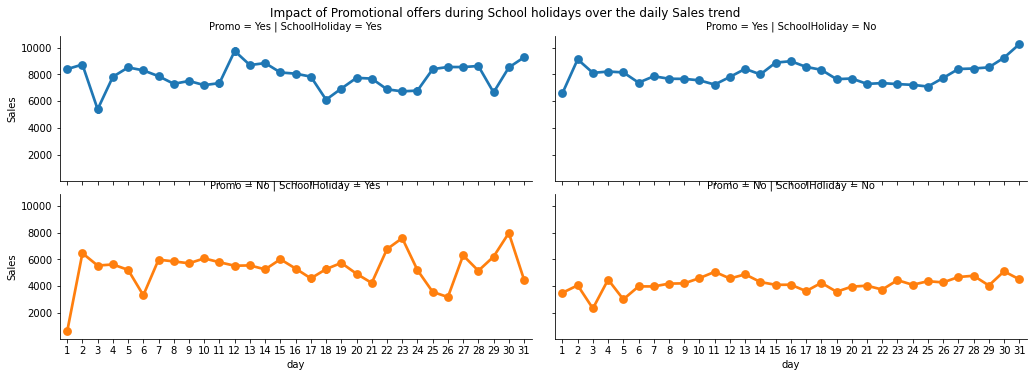

In [ ]:
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
# https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package
g = sns.factorplot(data=train_store_data, x='day',y='Sales',col='SchoolHoliday',
               row='Promo',hue='Promo',col_order=['Yes','No']
                )
g.fig.set_size_inches(15,5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of Promotional offers during School holidays over the daily Sales trend')
plt.show()

**Observation:** *Sales are more during school holidays than normally and adding promotional offers seemed a bit more impactful during normal days. But we cannot ignore the improvement during the school holidays.*

###What is the impact of Promotional offers on the day of the week over the daily Sales trend?

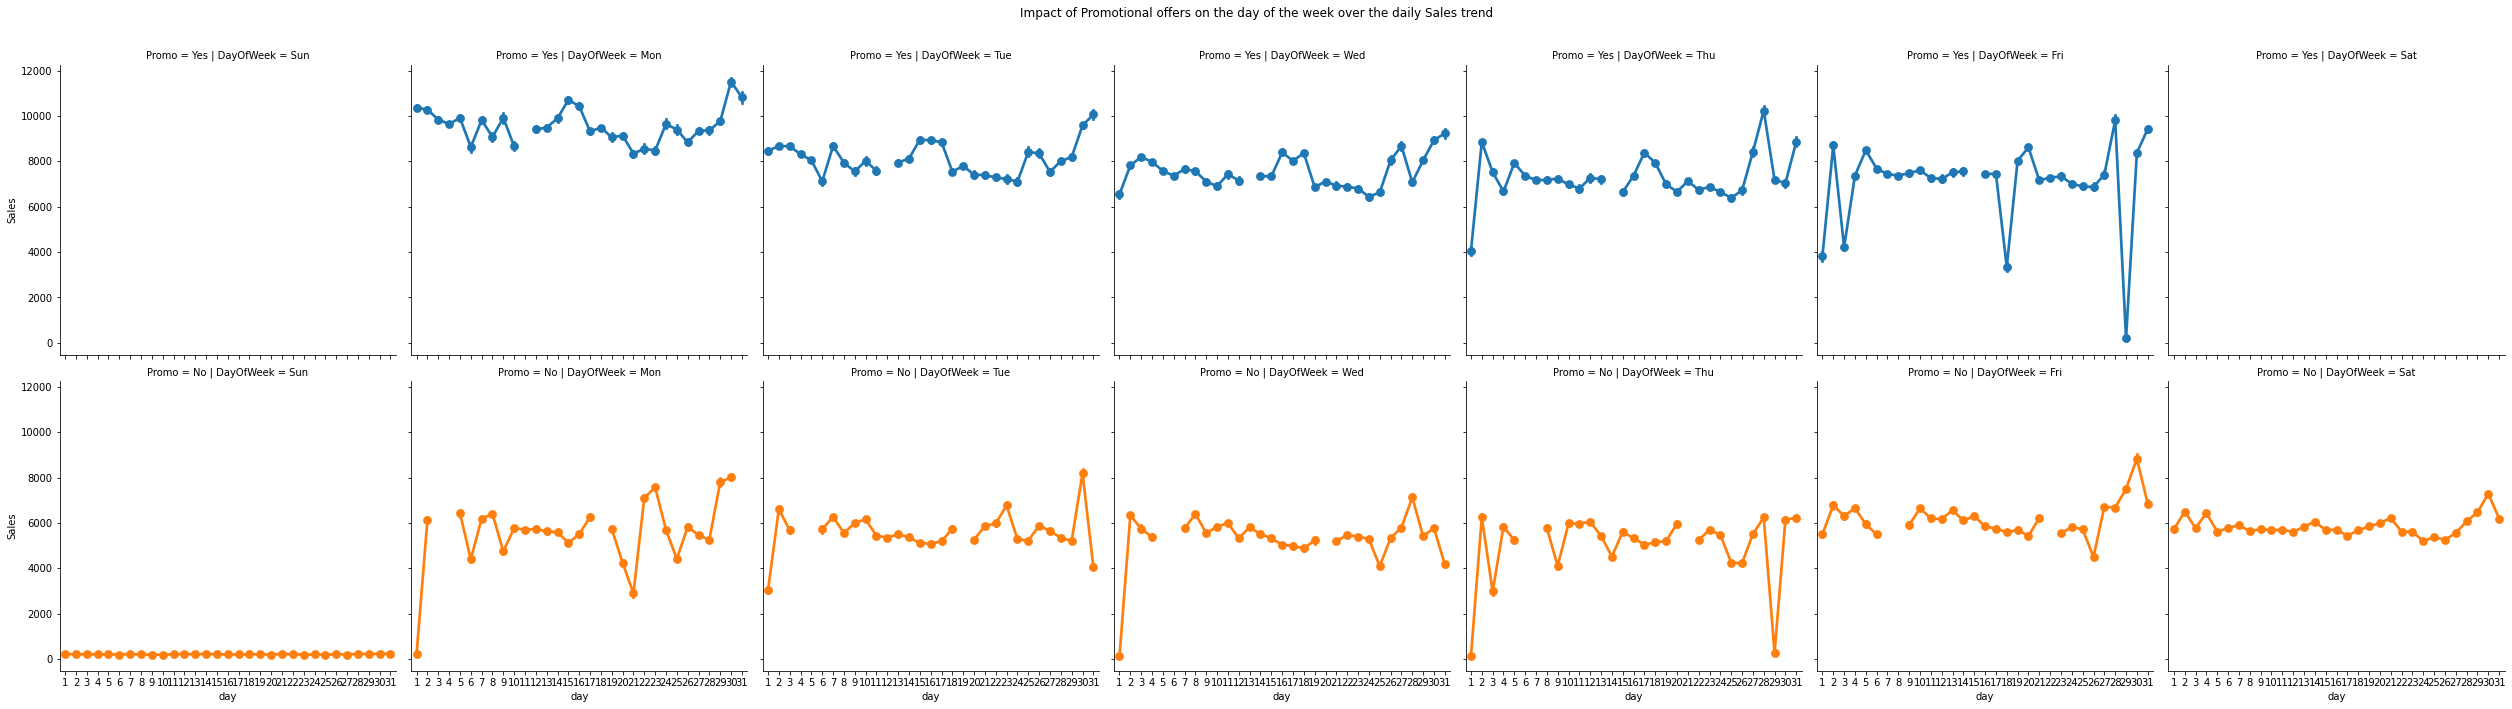

In [ ]:
g = sns.factorplot(data=train_store_data, x='day',y='Sales',col='DayOfWeek',
               row='Promo',hue='Promo',col_order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
                )
# g.fig.set_size_inches(15,8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of Promotional offers on the day of the week over the daily Sales trend')
plt.show()

**Observation:** *Promotional offers seemed to have been more fruitful on Mondays.*

###What is the impact of Promotional offers on StoreType over the daily Sales trend?

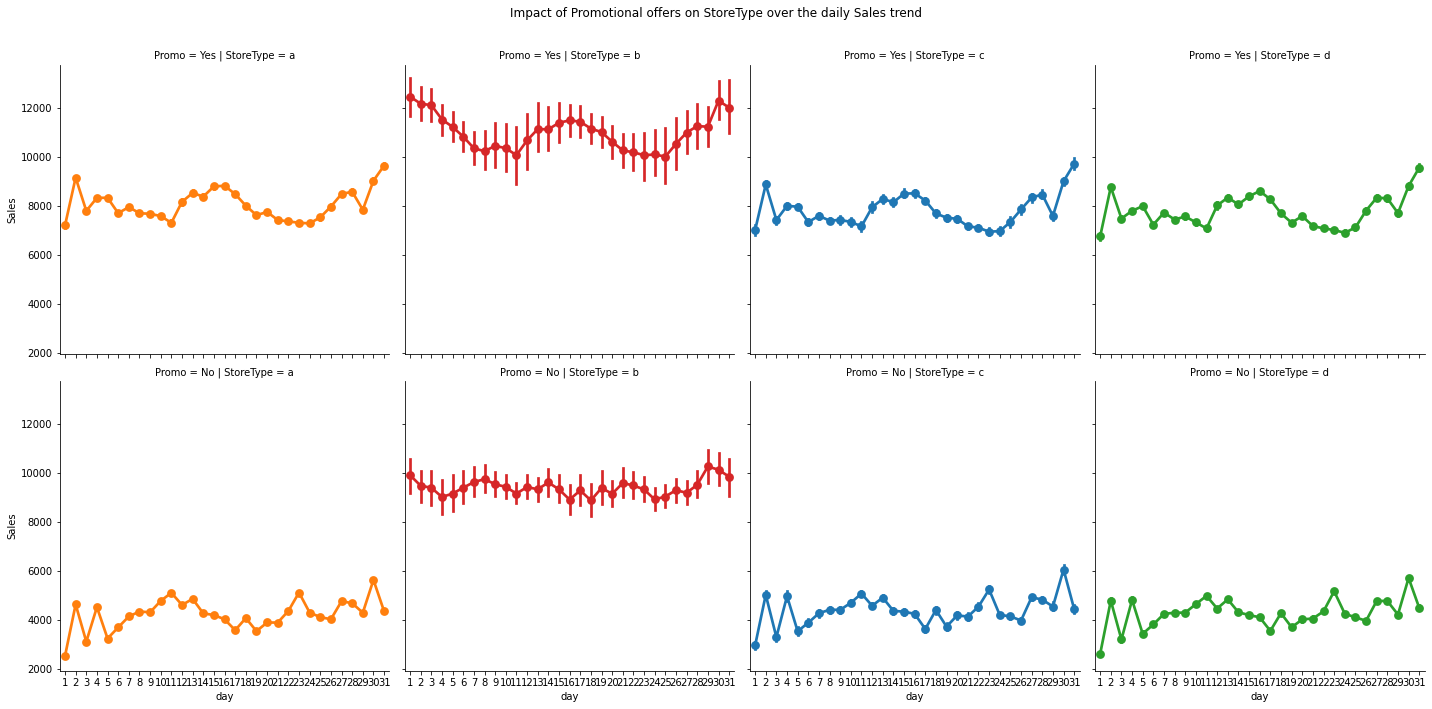

In [ ]:
g = sns.factorplot(data=train_store_data, x='day',y='Sales',col='StoreType',
               row='Promo',hue='StoreType',col_order=['a','b','c','d']
                )
# g.fig.set_size_inches(15,5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of Promotional offers on StoreType over the daily Sales trend')
plt.show()

**Observation:** *Promotional offers helped in increased sales for all the store types, however its impact is less on B store type.*

###What is the impact of Promotional offers on Assortments over the daily Sales trend?

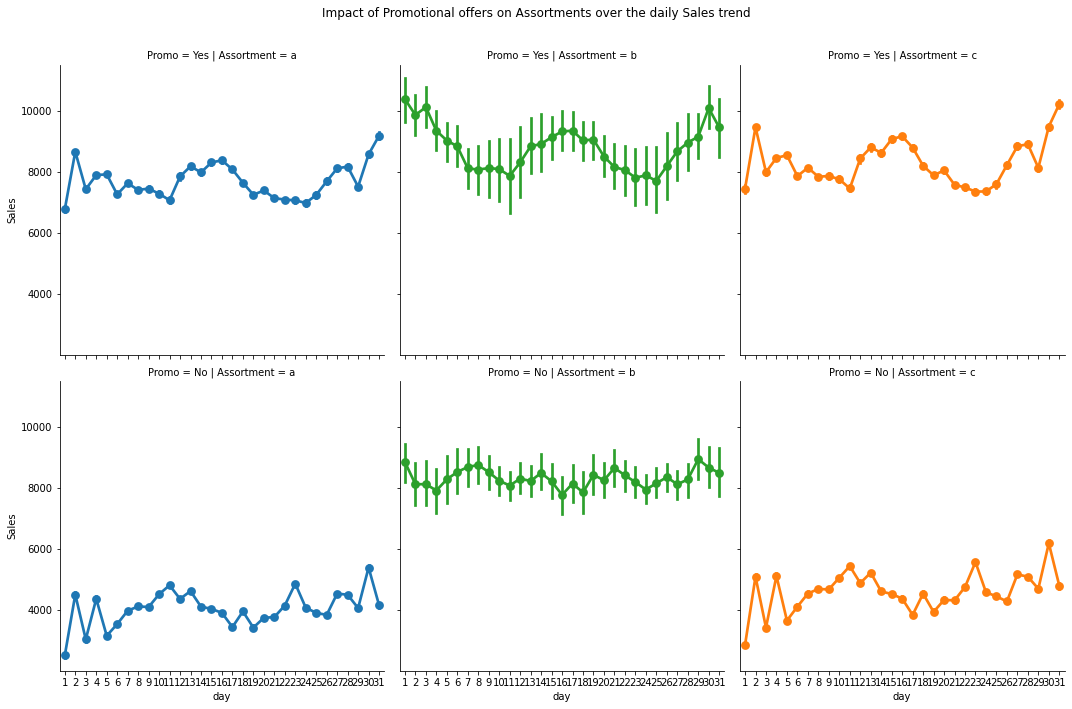

In [ ]:
g = sns.factorplot(data=train_store_data, x='day',y='Sales',col='Assortment',
               row='Promo',hue='Assortment',col_order=['a','b','c']
                )
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of Promotional offers on Assortments over the daily Sales trend')
plt.show()

**Observation:** *Offering promotional offers helped Assortments A,C to make more sales. It has least helped B assortment stores. This might be because of the fact that A,C assortments are quite more than B and aggregation helped here it seems.*

###What is the impact of the DayOfWeek on StoreType over the daily Sales trend?

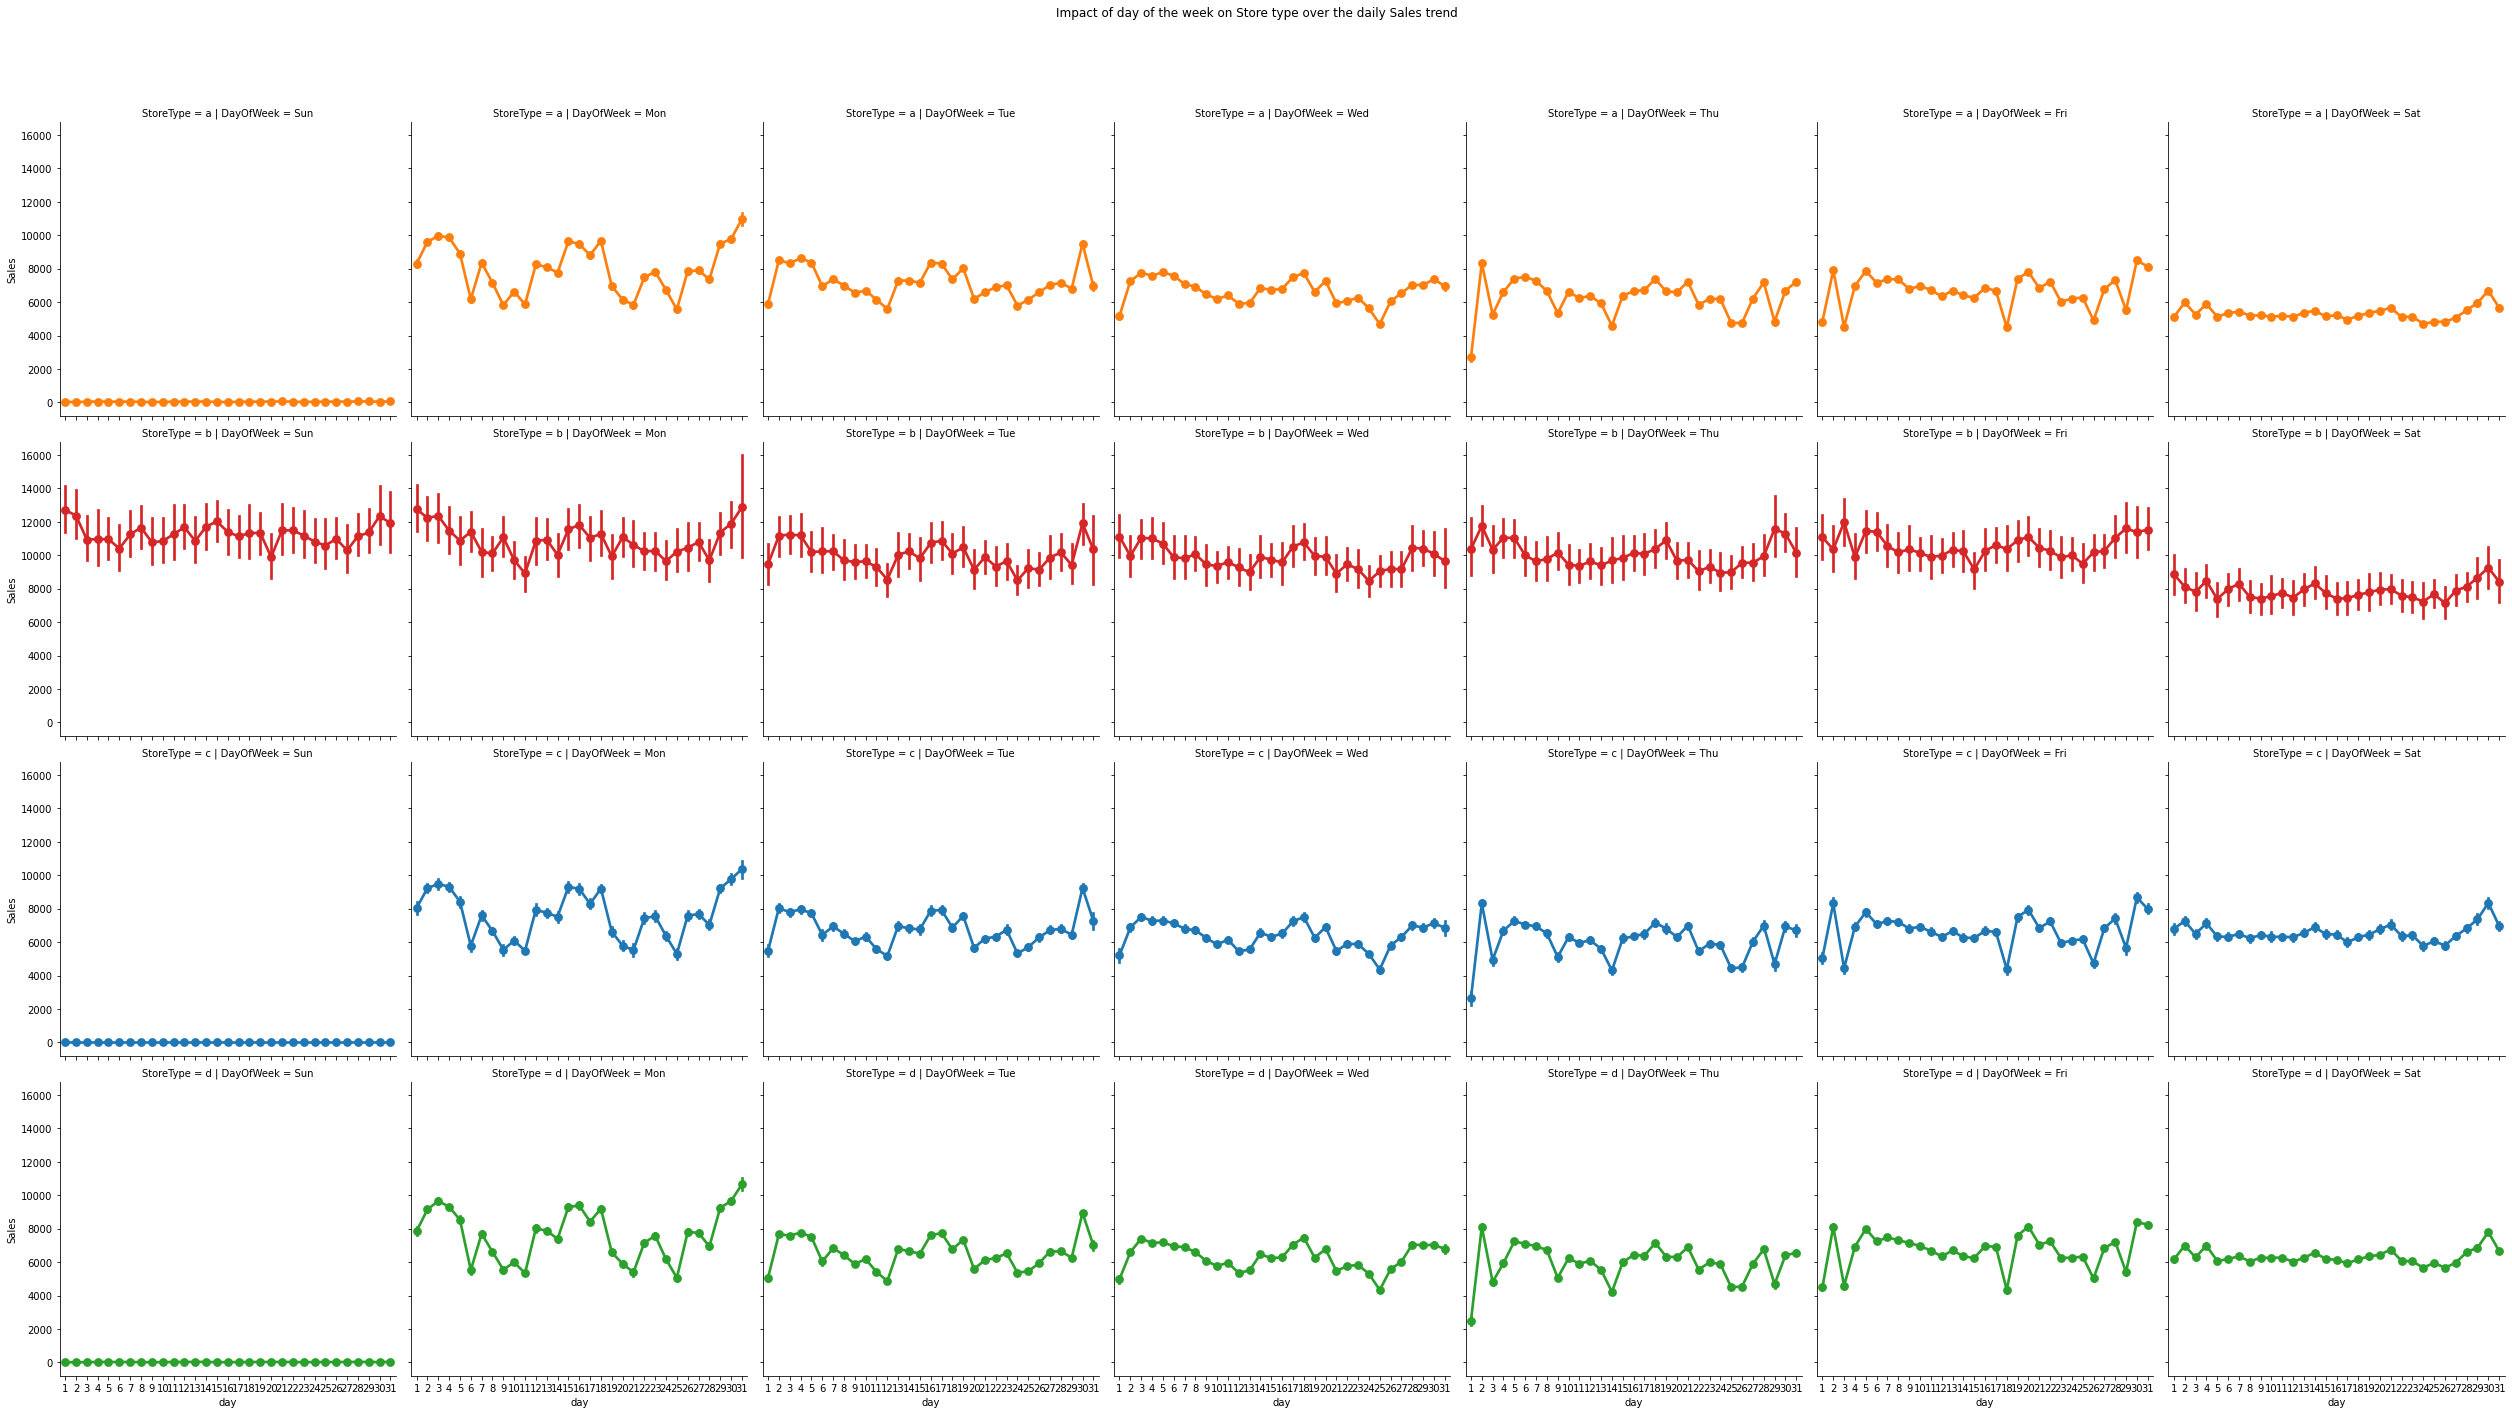

In [ ]:
g = sns.factorplot(data=train_store_data, x='day',y='Sales',col='DayOfWeek',
               row='StoreType',hue='StoreType',row_order=['a','b','c','d'], col_order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
                )
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of day of the week on Store type over the daily Sales trend')
plt.show()

**Observation:** *B store types are open even on Sundays, probably they sold emergency items. On other days it hardly made any difference.*

###What is the impact of the DayOfWeek on Assortment over the daily Sales trend?

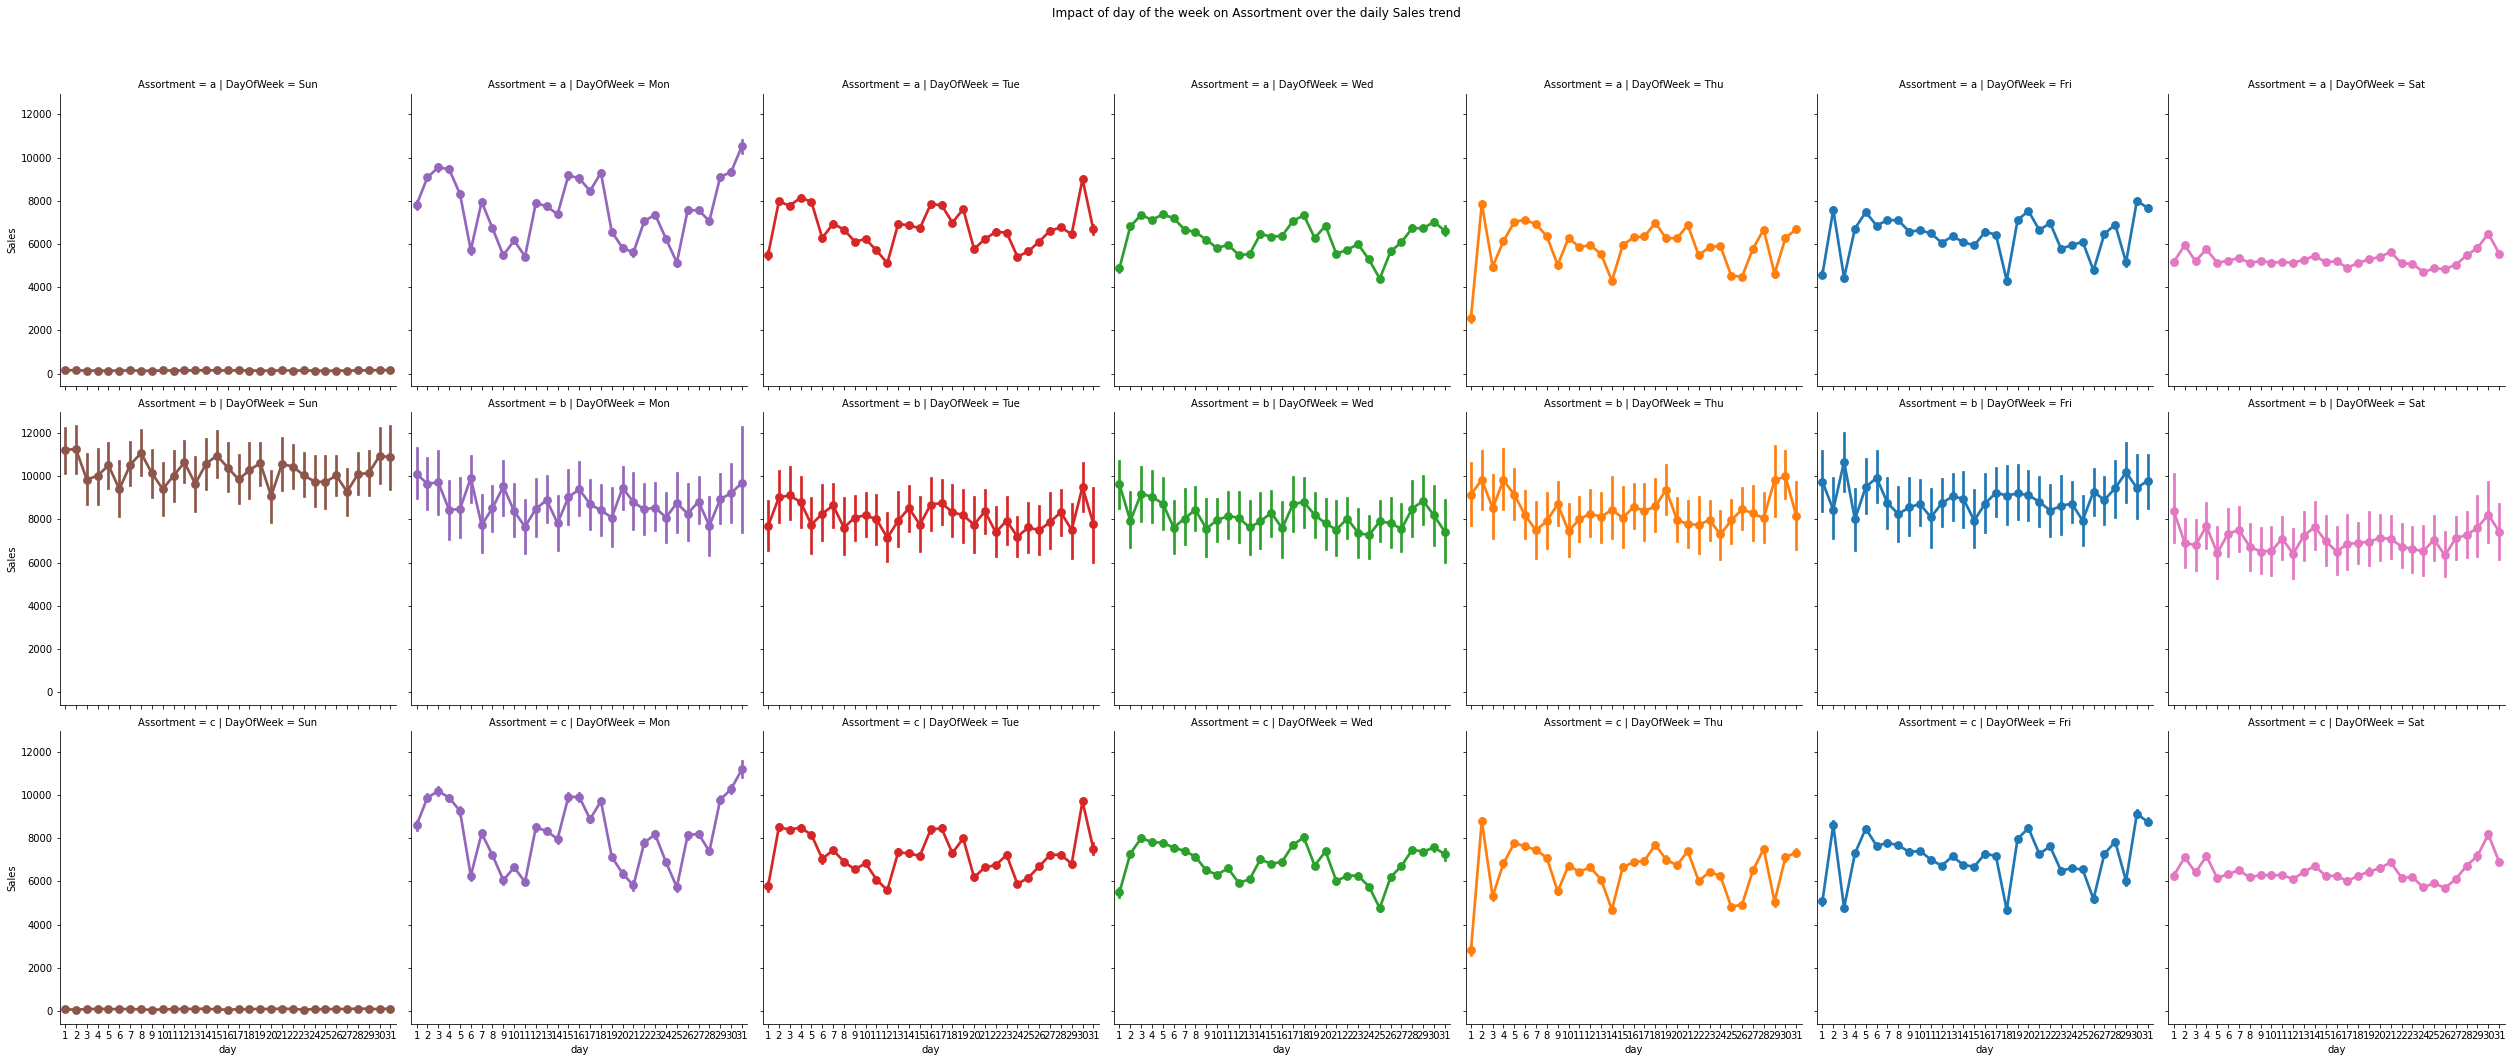

In [ ]:
g = sns.factorplot(data=train_store_data, x='day',y='Sales',col='DayOfWeek',
               row='Assortment',row_order=['a','b','c'], col_order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],
               hue='DayOfWeek'
                )
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of day of the week on Assortment over the daily Sales trend')
plt.show()

**Observation:** *Compared to other days of the week, Saturdays seems to be dull for business.*

###How does Promo2 and Promo impact the day wise Sales trend?

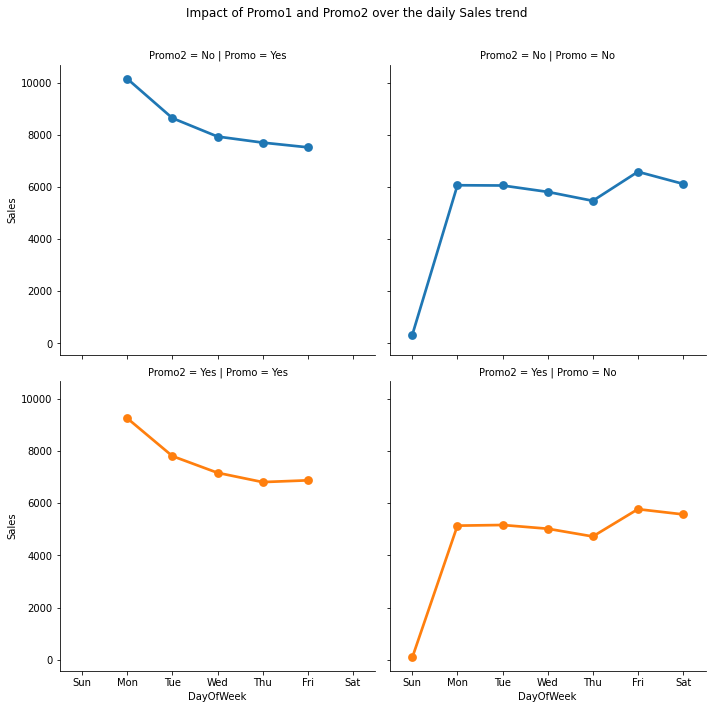

In [ ]:
g = sns.factorplot(data=train_store_data, x='DayOfWeek',y='Sales',col='Promo',
               row='Promo2',hue='Promo2',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
                )
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Impact of Promo1 and Promo2 over the daily Sales trend')
plt.show()

**Observation:** *Having Promo2 or not did not make much difference when Promo is already in place. Whether Promo2 offer is in place or not, having Promo helped in sales.*

https://medium.com/analytics-vidhya/multivariate-analysis-with-seaborn-622aaedc6ecc

In [66]:
# fig = px.line(train_store_data, x='Date', y='Sales', title='Time Series of Sales')
# fig.update_xaxes(rangeslider_visible=True)
# fig.show()

#Exploring some interesting Statistics from the Data

1. *Ideally we should have 1115 stores x 942 days of records, which is 1050330. But we have 1017209 records in the dataset. Let's see what stores have less than 942 days of data.*

In [ ]:
df = train_store_data.groupby(['Store'])['Sales'].count().reset_index().\
    rename(columns={'Sales':'Store_count'}).sort_values(by='Store_count',ascending =True)
df[df['Store_count']<942]

Store  Store_count
484     485          758
171     172          758
173     174          758
973     974          758
705     706          758
...     ...          ...
1026   1027          758
611     612          758
669     670          758
670     671          758
987     988          941

[181 rows x 2 columns]

**Observation:** *There are 181/1115 stores for which we have less than 942 days of data.*

2. *Which stores get the maximum/minimum customer footfalls in the last 2 years 7 months ?*

 Store StoreType Assortment  Customers
   733         b          b     3393.0
 Store StoreType Assortment  Customers
   543         c          a      206.0
Average number of customers that visit a store :  713


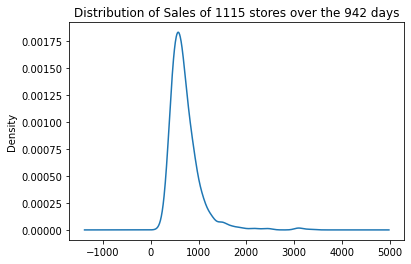

In [ ]:
df = train_store_data.groupby(['Store','StoreType','Assortment'])['Customers'].median().reset_index()
plt.title('Distribution of Customers who visited 1115 stores over the 942 days')
df['Customers'].plot.density()
print(df[df['Customers']==df['Customers'].max()].to_string(index=False))
print(df[df['Customers']==df['Customers'].min()].to_string(index=False))
print("Average number of customers that visit a store : ",math.trunc(df['Customers'].mean()))

**Observation:** *On average around 713 customers have visited each store in 942 days.*

3. *Which stores makes the maximum/minimum sales in the last 2 years 7 months ?*

 Store StoreType Assortment   Sales
   817         a          a 20914.0
 Store StoreType Assortment  Sales
   543         c          a 2028.5
Average sales made in a store :  6209


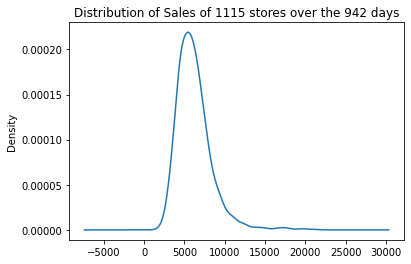

In [ ]:
df = train_store_data.groupby(['Store','StoreType','Assortment'])['Sales'].median().reset_index()
plt.title('Distribution of Sales of 1115 stores over the 942 days')
df['Sales'].plot.density()
print(df[df['Sales']==df['Sales'].max()].to_string(index=False))
print(df[df['Sales']==df['Sales'].min()].to_string(index=False))
print("Average sales made in a store : ",math.trunc(df['Sales'].mean()))

**Observation:** *From the above 2 plots it is observed that the number of customer foot falls is highly related to sales made. Store with ID 543 which was least visited made least sales among all the stores.*

4. *Let's find the number of state holidays observed in the last 2 years and 7 months. Also we will find if all the stores have observed the state holiday.*

   State Holiday  # Stores that observed holiday
0     2013-01-01                            1097
1     2013-01-06                             307
2     2013-03-29                            1099
3     2013-04-01                            1084
4     2013-05-01                            1097
5     2013-05-09                            1085
6     2013-05-20                            1082
7     2013-05-30                             681
8     2013-08-15                             154
9     2013-10-03                            1075
10    2013-10-31                             164
11    2013-11-01                             572
12    2013-11-20                              75
13    2013-12-25                            1098
14    2013-12-26                            1096
15    2014-01-01                            1097
16    2014-01-06                             306
17    2014-04-18                            1098
18    2014-04-21                            1083
19    2014-05-01    

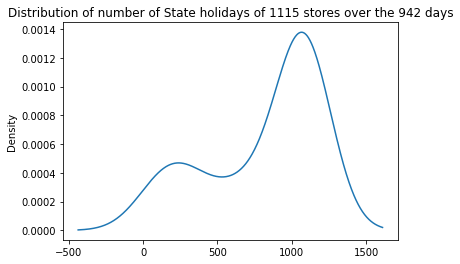

In [ ]:
df = train_store_data[(train_store_data['StateHoliday']=='Yes')&(train_store_data['Open']=='No')].groupby(['Date'])['StateHoliday'].count().reset_index().rename(columns={'StateHoliday':'# Stores that observed holiday','Date':'State Holiday'})
print(df)
print(df[df['# Stores that observed holiday']==1115].shape[0],' state holidays are observed by all the stores.')
plt.title('Distribution of number of State holidays of 1115 stores over the 942 days')
df['# Stores that observed holiday'].plot.density()
plt.show()

**Observation:** *In the last 942 days, 37 state holidays are observed and there was not a state holiday which is observed by all the 1115 stores. Also from the above analysis, the store that observed a state holiday in one year need not observe the same state holiday in the next year even for Christmas.*

5.  *Let's find the number of school holidays observed in the last 2 years and 7 months. Also we will find if all stores have observed the school holiday.*

0  school holidays are observed by all the stores out of  201


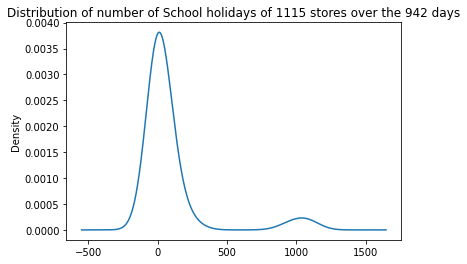

In [ ]:
df = train_store_data[(train_store_data['SchoolHoliday']=='Yes')&(train_store_data['Open']=='No')].groupby(['Date'])['SchoolHoliday'].count().reset_index()\
            .rename(columns={'SchoolHoliday':'# Stores that observed holiday','Date':'School Holiday'})
print(df[df['# Stores that observed holiday']==1115].shape[0],' school holidays are observed by all the stores out of ', df.shape[0])
df['# Stores that observed holiday'].plot.density()
plt.title('Distribution of number of School holidays of 1115 stores over the 942 days')
plt.show()

**Observation:** *In the last 942 days, 201 school holidays are observed and there was not one school holiday which is observed by all the 1115 stores. Unlike state holidays, school holidays are many and hardly observed by many.*

6.  *Obviously from the above analysis, we noted that there are some stores that are open even on a state holiday or school holiday. Let's find the stores which are open throughout the last 2 years and 7 months.*

In [ ]:
df = train_store_data[(train_store_data['Open']=='Yes')].groupby(['Store','StoreType','Assortment'])['Open'].count().reset_index().rename(columns={'Open':'No.of days it is open'})
print(df[df['No.of days it is open']==df['No.of days it is open'].max()].to_string(index=False))
print(df[df['No.of days it is open']==df['No.of days it is open'].max()].shape[0])

 Store StoreType Assortment  No.of days it is open
    85         b          a                    942
   262         b          a                    942
   335         b          a                    942
   423         b          a                    942
   494         b          a                    942
   562         b          c                    942
   682         b          a                    942
   733         b          b                    942
   769         b          b                    942
  1097         b          b                    942
10


**Observation:** *10 stores are running open throughout the 942 days without holidays. It is to be noted that all the stores are of type 'B'.*

In [ ]:
train_store_data[(train_store_data['StoreType']=='b')].groupby(['StoreType','Store'])['Open'].count().reset_index()

StoreType  Store  Open
0          b     85   942
1          b    259   942
2          b    262   942
3          b    274   942
4          b    335   942
5          b    353   942
6          b    423   942
7          b    494   942
8          b    512   758
9          b    562   942
10         b    676   942
11         b    682   942
12         b    733   942
13         b    769   942
14         b    948   942
15         b   1081   942
16         b   1097   942

**Observation:** *Out of the 16 B store types, 10 are open throughout the 942 days.*

On average a store is opened for  757


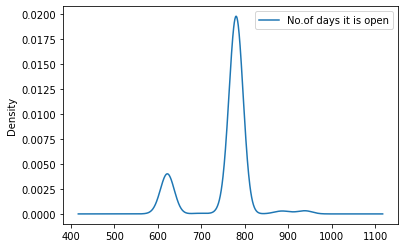

In [ ]:
ax = df['No.of days it is open'].plot.density(legend=True)
print('On average a store is opened for ',math.trunc(df['No.of days it is open'].mean()))

**Observation:** *On average, stores are running open for 757 days in the 942 days.*

7.  *Obviously holidays are a good time for consumers to shop. Let's see if stores are offer more promotional offers for a school holiday or state holiday.*

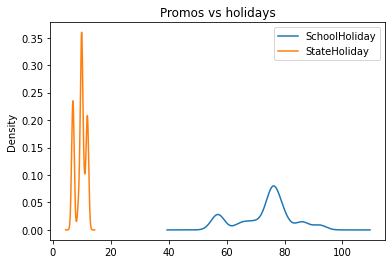

In [ ]:
df = train_store_data[(train_store_data['SchoolHoliday']=='Yes')&(train_store_data['Promo']=='Yes')].groupby(['Store'])['Promo'].count().reset_index().rename(columns={'Promo':'SchoolHoliday'})
df2 = train_store_data[(train_store_data['StateHoliday']=='Yes')&(train_store_data['Promo']=='Yes')].groupby(['Store'])['Promo'].count().reset_index().rename(columns={'Promo':'StateHoliday'})
ax = df['SchoolHoliday'].plot.density(legend=True)
df2['StateHoliday'].plot.density(ax=ax,legend=True,sharey=True)
plt.title('Promos vs holidays')
plt.show()

**Observation:** *Stores offer more promotional offers on school holidays than on state holidays. This might be because more stores remain closed on state holiday compared to a school holiday and it might be wrong to judge based on this as the number of school holidays(201) are more than state holidays(37).*

8. *Does promotional offers help in increasing the sales of the stores?*

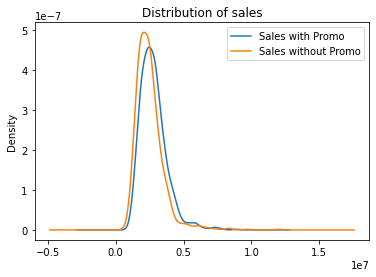

In [ ]:
df = train_store_data[(train_store_data['Promo']=='Yes')&(train_store_data['Open']=='Yes')].groupby(['Store'])['Sales'].sum().reset_index().rename(columns={'Sales':'Sales with Promo'})
df2 = train_store_data[(train_store_data['Promo']=='No')&(train_store_data['Open']=='Yes')].groupby(['Store'])['Sales'].sum().reset_index().rename(columns={'Sales':'Sales without Promo'})
plt.title('Distribution of sales')
ax = df['Sales with Promo'].plot.density(legend=True)
df2['Sales without Promo'].plot.density(ax=ax,legend=True)
plt.show()

**Observation:** *Promotional offers did help in increasing the sales.*

9. *Does promotional offers help in pulling more crowd to the stores?*

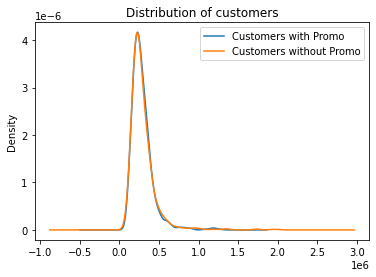

In [ ]:
df = train_store_data[(train_store_data['Promo']=='Yes')&(train_store_data['Open']=='Yes')].groupby(['Store'])['Customers'].sum().reset_index().rename(columns={'Customers':'Customers with Promo'})
df2 = train_store_data[(train_store_data['Promo']=='No')&(train_store_data['Open']=='Yes')].groupby(['Store'])['Customers'].sum().reset_index().rename(columns={'Customers':'Customers without Promo'})
plt.title('Distribution of customers')
ax = df['Customers with Promo'].plot.density(legend=True)
df2['Customers without Promo'].plot.density(ax=ax,legend=True)
plt.show()

**Observation:** *Probably the same amount of customers have visited the irrespective of the promos but their purchasing tends to increased when promotions were offered.*

10. *Does offering promotional offers on School holidays help ?*

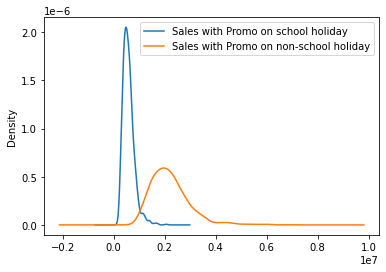

In [ ]:
df = train_store_data[(train_store_data['Promo']=='Yes')&(train_store_data['SchoolHoliday']=='Yes')&(train_store_data['Open']=='Yes')].groupby(['Store'])['Sales'].sum().reset_index().rename(columns={'Sales':'Sales with Promo on school holiday'})
df2 = train_store_data[(train_store_data['Promo']=='Yes')&(train_store_data['SchoolHoliday']=='No')&(train_store_data['Open']=='Yes')].groupby(['Store'])['Sales'].sum().reset_index().rename(columns={'Sales':'Sales with Promo on non-school holiday'})
ax = df['Sales with Promo on school holiday'].plot.density(legend=True)
df2['Sales with Promo on non-school holiday'].plot.density(ax=ax,legend=True)
plt.show()

**Observation:** *From the above analysis it is not so impactful.*

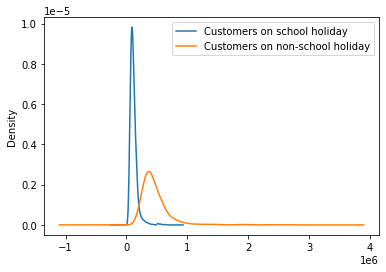

In [ ]:
df = train_store_data[(train_store_data['SchoolHoliday']=='Yes')&(train_store_data['Open']=='Yes')&(train_store_data['Sales']!=0)].groupby(['Store'])['Customers'].sum().reset_index().rename(columns={'Customers':'Customers on school holiday'})
df2 = train_store_data[(train_store_data['SchoolHoliday']=='No')&(train_store_data['Open']=='Yes')&(train_store_data['Sales']!=0)].groupby(['Store'])['Customers'].sum().reset_index().rename(columns={'Customers':'Customers on non-school holiday'})
ax = df['Customers on school holiday'].plot.density(legend=True)
df2['Customers on non-school holiday'].plot.density(ax=ax,legend=True)
plt.title('Does offering promotional offers on School holidays help ?')
plt.show()

11. *Does offering promotional offers bring in more crowd on school holiday ?*

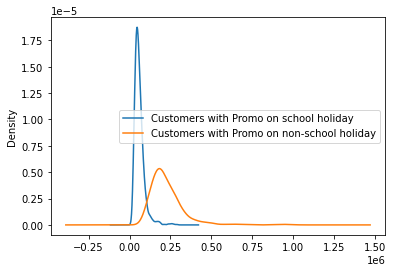

In [ ]:
df = train_store_data[(train_store_data['Promo']=='Yes')&(train_store_data['SchoolHoliday']=='Yes')&(train_store_data['Open']=='Yes')&(train_store_data['Sales']!=0)].groupby(['Store'])['Customers'].sum().reset_index().rename(columns={'Customers':'Customers with Promo on school holiday'})
df2 = train_store_data[(train_store_data['Promo']=='Yes')&(train_store_data['SchoolHoliday']=='No')&(train_store_data['Open']=='Yes')&(train_store_data['Sales']!=0)].groupby(['Store'])['Customers'].sum().reset_index().rename(columns={'Customers':'Customers with Promo on non-school holiday'})
ax = df['Customers with Promo on school holiday'].plot.density(legend=True)
df2['Customers with Promo on non-school holiday'].plot.density(ax=ax,legend=True)
plt.show()

**Observation:** *From the analysis it is not so.*

12. *What store types are open on a Sunday?*

In [ ]:
train_store_data[(train_store_data['DayOfWeek']=='Sun')].groupby(['StoreType'])['Store'].count().reset_index()

StoreType  Store
0         a  78484
1         b   2252
2         c  19468
3         d  44526

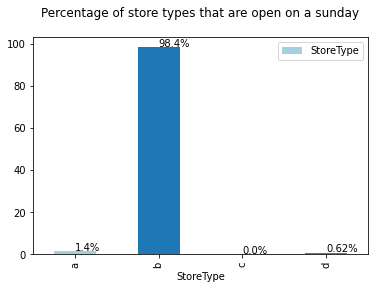

In [42]:
df = train_store_data[(train_store_data['DayOfWeek']=='Sun')&(train_store_data['Open']=='Yes')].groupby(['StoreType'])['Open'].count().reset_index()
df2 = train_store_data[(train_store_data['DayOfWeek']=='Sun')].groupby(['StoreType'])['Store'].count().reset_index()
df.set_index(['StoreType'],inplace=True)
df2.set_index(['StoreType'],inplace=True)
df3 = 100*df['Open'].div(df2['Store'],fill_value=0)
# Pandas divide two dataframe with different sizes: https://stackoverflow.com/a/59811130
# df3
plt.title('Percentage of store types that are open on a sunday')
ax = df3.plot.bar(label='StoreType',color=plt.cm.Paired(np.arange(len(df3))))
ax.set_title('Percentage of store types that are open on a sunday',pad=20)
for idx, label in enumerate(list(df3.index)): # a,b,c,d
    value = np.round(df3.iloc[idx],decimals=2)
    ax.annotate(str(value)+ '%',(idx,value ), xytext=(0, 1),textcoords='offset pixels')
    # https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
plt.legend()
plt.show()

**Observation:** 
* *C store type never stayed Open on a sunday in 2 years and 7 months.*
* *On a Sunday, B store type stores are most opened among others, 98.4% of the times. This could be the reason why B store types are making more sales.*
* *A and C store types opened for around 1% of times on a sunday.*

12 ii). *What assortment types are open on a Sunday?*

Assortment
a     1.331206
b    99.152542
c     2.094576
dtype: float64


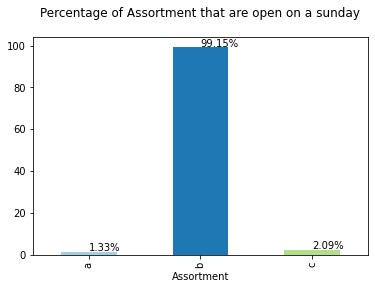

In [43]:
df = train_store_data[(train_store_data['DayOfWeek']=='Sun')&(train_store_data['Open']=='Yes')].groupby(['Assortment'])['Open'].count().reset_index()
df2 = train_store_data[(train_store_data['DayOfWeek']=='Sun')].groupby(['Assortment'])['Store'].count().reset_index()
df.set_index(['Assortment'],inplace=True)
df2.set_index(['Assortment'],inplace=True)
df3 = 100*df['Open'].div(df2['Store'],fill_value=0)
print(df3)
# ax = df3.plot.bar()
ax = df3.plot.bar(color=plt.cm.Paired(np.arange(len(df3))))
ax.set_title('Percentage of Assortment that are open on a sunday',pad=20)
for idx, label in enumerate(list(df3.index)): # a,b,c
    value = np.round(df3.iloc[idx],decimals=2)
    ax.annotate(str(value)+ '%',(idx, value), xytext=(0, 1),textcoords='offset pixels')
plt.show()

**Observation:** *On a sunday, 99.15 % of the times B assortments are open and this is in quite contrast with the other assortments A and C which opened for only around 2% of the times. This could be the reason why B assortment type stores are making more sales.*

13. *Which week of the year saw most/least crowd?*

 week  Customers
   51      861.0
 week  Customers
   52      426.5


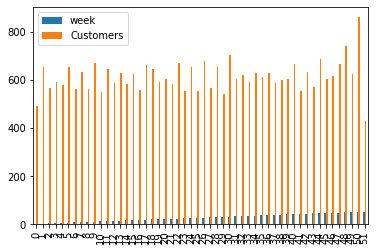

In [ ]:
df = train_store_data.groupby(['week'])['Customers'].median().reset_index()
print(df[df['Customers']==df['Customers'].max()].to_string(index=False))
print(df[df['Customers']==df['Customers'].min()].to_string(index=False))

*Let's understand why there is dip in the number of customers during 52nd week.One possible reason is stores could be closed for christmas in the last two weeks.*

In [ ]:
def stores_open_status(week):
    df = train_store_data[((train_store_data['week']==week) &(train_store_data['Open']=='No'))].groupby('Store')['Open'].count().reset_index()
    df.sort_values(by='Open',ascending=False).rename(columns={'Open':'No.of times the store is opened in this week'}).head()
    print(df.shape[0],'stores are closed in',week,'st week but at maximum for', df['Open'].max(), 'days')
    return df.head()

In [ ]:
stores_open_status(51)
#descending order

1087 stores are closed in 51 week but at maximum for 2 days


Store  Open
0      1     2
1      2     2
2      3     2
3      4     2
4      5     2

In [ ]:
stores_open_status(52)
#descending order

1098 stores are closed in 52 week but at maximum for 6 days


Store  Open
0      1     6
1      2     6
2      3     6
3      4     6
4      5     6

**Observation:** *It is clear from the above analysis that most stores are closed for a maximum of 6 days during 52nd week, that's the reason why there is a dip in customers and sales.*

14. *Which day of the month saw most/least crowd?*

In [ ]:
df = train_store_data.groupby(['day'])['Customers'].median().reset_index()
print(df[df['Customers']==df['Customers'].max()].to_string(index=False))
print(df[df['day']==31].to_string(index=False))
print(df[df['Customers']==df['Customers'].min()].to_string(index=False))

 day  Customers
  30      716.0
 day  Customers
  31      620.0
 day  Customers
   1      475.0


In [ ]:
# train_store_data[(train_store_data['day']==(1 or 30 or 31))&(train_store_data['Promo']=='Yes')].groupby('day')['Sales'].sum()

15. *Which days of the week saw most/least crowd?*

In [ ]:
df = train_store_data.groupby(['DayOfWeek'])['Customers'].median().reset_index()
print(df[df['Customers']==df['Customers'].max()].to_string(index=False))
print(df[df['Customers']==df['Customers'].min()].to_string(index=False))

DayOfWeek  Customers
      Mon      748.0
DayOfWeek  Customers
      Sun        0.0


16. *Are there any stores that registered no sales despite being Open?*

In [ ]:
df = train_store_data[(train_store_data['Open']=='Yes')&(train_store_data['Sales']==0)].\
groupby(['Store','Date'])['Sales'].count().reset_index()
print(df[['Store','Date']])

    Store       Date
0      25 2014-02-12
1      25 2014-02-13
2      28 2014-09-02
3      28 2014-09-03
4      28 2014-09-04
5      57 2014-07-01
6     102 2014-07-12
7     102 2014-07-24
8     227 2014-09-11
9     232 2013-01-24
10    238 2014-07-24
11    259 2013-02-07
12    303 2014-07-24
13    327 2014-03-12
14    339 2013-01-30
15    339 2013-01-31
16    353 2013-03-16
17    357 2014-09-22
18    364 2013-05-07
19    364 2013-05-08
20    387 2014-07-24
21    391 2013-08-28
22    548 2014-09-05
23    589 2013-04-29
24    623 2014-01-24
25    623 2014-01-25
26    661 2014-04-04
27    663 2013-09-02
28    665 2013-06-28
29    665 2013-06-29
30    674 2015-03-26
31    681 2013-05-10
32    699 2015-02-05
33    700 2013-06-05
34    708 2014-10-01
35    762 2013-01-17
36    835 2014-09-10
37    835 2014-09-11
38    850 2014-03-29
39    882 2014-07-23
40    887 2014-07-23
41    925 2014-07-03
42    927 2013-08-08
43    948 2013-04-25
44    971 2015-05-15
45    983 2014-01-17
46    983 201

**Observation:** *There are 54 days on which stores have registered Zero sales even when they are open. Some stores with IDs 25, 28, 339, 364, 665,835, 983, 1017, 1039, 1100 did not make any sales for 2 consecutively opened days.*

17. *Which days/weeks of the month can we find more promotional offers?*

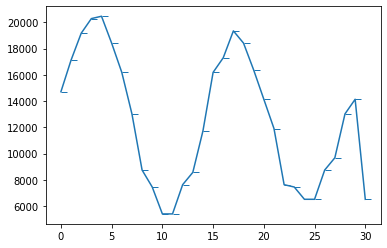

In [ ]:
df = train_store_data[(train_store_data['Promo']=='Yes')].groupby(['day'])['Promo'].count().reset_index()
# print(df)
df['Promo'].plot.line(marker=True)
plt.show()

**Observation:** *First and third weeks of months see a increase in promotional offers.*

18. *Let's find the week during which each store remained more closed during the 942 days.*

In [ ]:
df = train_store_data[((train_store_data['Open']=='No'))].groupby(['Store','week'])['Open'].count().reset_index().rename(columns={'Open':'closed for days'})
df = df.sort_values('closed for days').drop_duplicates(['Store'],keep='last')
df.sort_values('Store')
# Get the row(s) which have the max value in groups using groupby :  https://stackoverflow.com/a/54041328

Store  week  closed for days
17         1    18                6
52         2     1                6
104        3     1                6
173        4    18                6
208        5     1                6
...      ...   ...              ...
56496   1111    52                6
56548   1112    52                6
56600   1113    52                6
56652   1114    52                6
56704   1115    52                6

[1105 rows x 3 columns]

19. *Which days of the week can we find more promotional offers?*

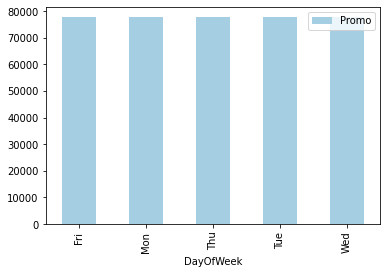

In [ ]:
df = train_store_data[(train_store_data['Promo']=='Yes')].groupby(['DayOfWeek'])['Promo'].count().reset_index()
# print(df)
df.set_index('DayOfWeek',inplace=True)
# df['Promo'].plot.bar()
ax = df.plot.bar(color=plt.cm.Paired(np.arange(len(df))))
plt.show()

*Promotions are distributed equally on all the weekdays.*

20. *Does a particular store type offer more number of Promotional offers?*



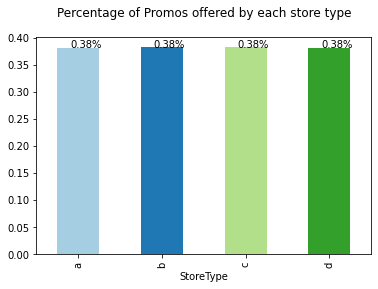

In [53]:
df = train_store_data[(train_store_data['Promo']=='Yes')].groupby(['StoreType'])['Promo'].count().reset_index()#.sort_values(by='Promo',ascending =True)
df2 = train_store_data.groupby('StoreType')['Store'].count().reset_index()
df.set_index(['StoreType'],inplace=True)
df2.set_index(['StoreType'],inplace=True)
df3 = df['Promo'].div(df2['Store'])
# ax = df3.plot.bar()
ax = df3.plot.bar(color=plt.cm.Paired(np.arange(len(df3))))
ax.set_title('Percentage of Promos offered by each store type',pad=20)
for idx, label in enumerate(list(df3.index)): # a,b,c
    value = np.round(df3.iloc[idx],decimals=2)
    ax.annotate(str(value)+ '%',(idx-.1, value), xytext=(0, 1),textcoords='offset pixels')
plt.show()

**Observation:** *Though number of store types are different, the percentage of promotions offered by each store type is same.*

21. *Does a particular store type offer more number of Promo2 offers?*



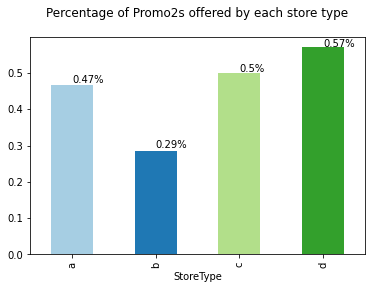

In [54]:
df = train_store_data[(train_store_data['Promo2']=='Yes')].groupby(['StoreType'])['Promo2'].count().reset_index()#.sort_values(by='Promo',ascending =True)
df2 = train_store_data.groupby('StoreType')['Store'].count().reset_index()
df.set_index(['StoreType'],inplace=True)
df2.set_index(['StoreType'],inplace=True)
df3 = df['Promo2'].div(df2['Store'])
# ax = df3.plot.bar()
ax = df3.plot.bar(color=plt.cm.Paired(np.arange(len(df3))))
ax.set_title('Percentage of Promo2s offered by each store type',pad=20)
for idx, label in enumerate(list(df3.index)): # a,b,c
    value = np.round(df3.iloc[idx],decimals=2)
    ax.annotate(str(value)+ '%',(idx, value), xytext=(0, 1),textcoords='offset pixels')
plt.show()

22. *Does a particular Assortment type offer more number of Promotional offers?*

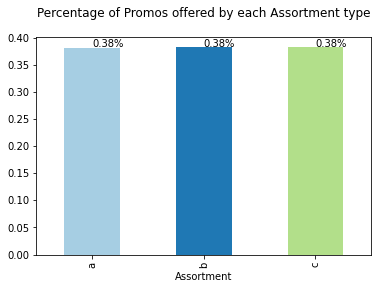

In [55]:
df = train_store_data[(train_store_data['Promo']=='Yes')].groupby(['Assortment'])['Promo'].count().reset_index()#.sort_values(by='Promo',ascending =True)
df2 = train_store_data.groupby('Assortment')['Store'].count().reset_index()
df.set_index(['Assortment'],inplace=True)
df2.set_index(['Assortment'],inplace=True)
df3 = df['Promo'].div(df2['Store'])
ax = df3.plot.bar(color=plt.cm.Paired(np.arange(len(df3))))
ax.set_title('Percentage of Promos offered by each Assortment type',pad=20)
for idx, label in enumerate(list(df3.index)): # a,b,c
    value = np.round(df3.iloc[idx],decimals=2)
    ax.annotate(str(value)+ '%',(idx, value), xytext=(0, 1),textcoords='offset pixels')
plt.show()

**Observation:** *Though number of assortment types are different, the percentage of promotions offered by each assortment is same.*

23. *Does a particular Assortment type offer more number of Promo2 offers?*

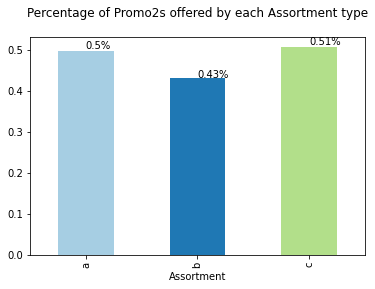

In [56]:
df = train_store_data[(train_store_data['Promo2']=='Yes')].groupby(['Assortment'])['Promo2'].count().reset_index()#.sort_values(by='Promo',ascending =True)
df2 = train_store_data.groupby('Assortment')['Store'].count().reset_index()
df.set_index(['Assortment'],inplace=True)
df2.set_index(['Assortment'],inplace=True)
df3 = df['Promo2'].div(df2['Store'])
ax = df3.plot.bar(color=plt.cm.Paired(np.arange(len(df3))))
ax.set_title('Percentage of Promo2s offered by each Assortment type',pad=20)
for idx, label in enumerate(list(df3.index)): # a,b,c
    value = np.round(df3.iloc[idx],decimals=2)
    ax.annotate(str(value)+ '%',(idx, value), xytext=(0, 1),textcoords='offset pixels')
plt.show()

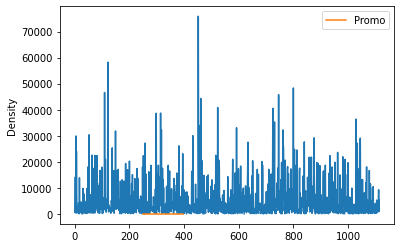

In [ ]:
df = train_store_data.groupby(['Store'])['CompetitionDistance'].min().reset_index()
ax = df['CompetitionDistance'].plot()
df2 = train_store_data[train_store_data['Promo']=='Yes'].groupby(['Store'])['Promo'].count().reset_index()
df2['Promo'].plot.density(ax=ax,legend=True)
ndf = pd.merge(df,df2)
plt.show()

24. *What store types have nearest competition?*

**Let's find percentile**

In [ ]:
df = train_store_data.groupby(['StoreType'])['CompetitionDistance'].quantile(.5).reset_index()
df.head()

StoreType  CompetitionDistance
0         a               1790.0
1         b                900.0
2         c               1650.0
3         d               5070.0

**Observation:** *When we compare 50 percentiles of competition distance for all the stores, b store types seem to have competitors in the nearest distance.*

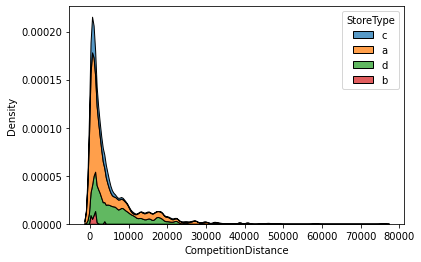

In [ ]:
sns.kdeplot(x='CompetitionDistance',data = train_store_data,hue='StoreType',shade=True,multiple='stack')
plt.show()

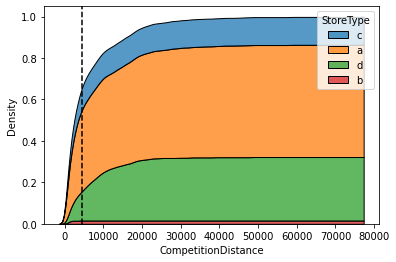

In [61]:
sns.kdeplot(x='CompetitionDistance',data = train_store_data,hue='StoreType',shade=True,multiple='stack',cumulative=True)
plt.axvline(np.quantile(train_store_data[train_store_data['StoreType']=='c']['CompetitionDistance'].values,0.8),color='k',ls='--',label='80th percentile')
# plt.legend()
plt.show()

25. *What Assortments have nearest competition?*

In [29]:
df = train_store_data.groupby(['Assortment'])['CompetitionDistance'].quantile(.5).reset_index()
df

Assortment  CompetitionDistance
0          a               1840.0
1          b                860.0
2          c               3430.0

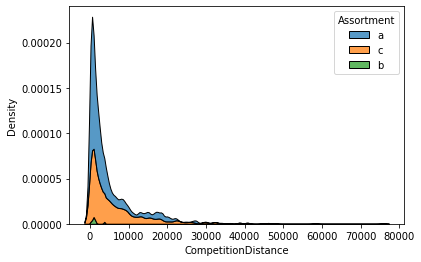

In [ ]:
sns.kdeplot(x='CompetitionDistance',data = train_store_data,hue='Assortment',shade=True,multiple='stack')
plt.show()

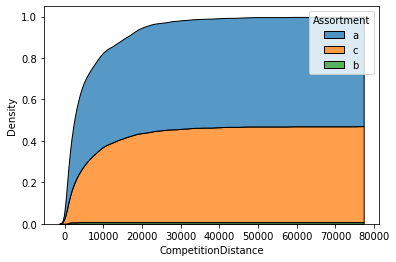

In [63]:
g = sns.kdeplot(x='CompetitionDistance',data = train_store_data,hue='Assortment',shade=True,multiple='stack',cumulative=True)
plt.axvline(np.quantile(train_store_data[train_store_data['Assortment']=='a']['CompetitionDistance'].values,0.8),color='k',ls='--',label='80th percentile')
# plt.legend()
plt.show()

**Observation:** *When we compare 50 percentiles of competition distance for all the stores, b Assortments seem to have competitors in the nearest distance.*

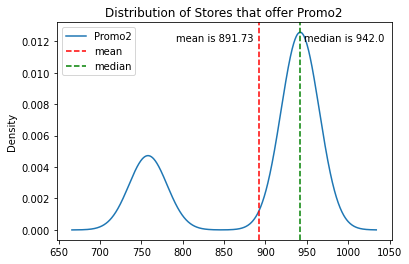

In [46]:
df = train_store_data[train_store_data['Promo2']=='Yes'].groupby(['Store','StoreType','Assortment'])['Promo2'].count().reset_index()
df['Promo2'].plot.density()
plt.axvline(x=df['Promo2'].mean(),ls='--',color='r',label='mean')
plt.axvline(x=df['Promo2'].median(),ls='--',color='g',label='median')
plt.title('Distribution of Stores that offer Promo2')
value = df['Promo2'].median()
mean = np.round(df['Promo2'].mean(),2)
plt.annotate('median is '+str(value),(value+5,.012))
plt.annotate('mean is '+str(mean),(mean-100,.012))
plt.legend()
plt.show()

*Surprisingly our data has 1115 stores and 942 days of data for each store and most of the stores are offering promos for 942 days.*

26. *How does competitors distance impact the business?*

* *Identify a store whose competition has started in 2014, so we can compare the sales before(2013) and after(2015) the competitor has started.*
* *In order to observe how nearest/farthest competitor impacts the business, let's sort the data in increasing order of competition distance.*
*  *Then we will take the first and last records to account for nearest competitor and farthest competitor respectively.*

In [ ]:
store_details = train_store_data[(train_store_data['CompetitionOpenSinceYear'] ==2014)].sort_values(by='CompetitionDistance')

In [ ]:
store_details.groupby(['Store'])['CompetitionDistance'].min().to_frame().reset_index().sort_values(by='CompetitionDistance')

Store  CompetitionDistance
3      30                 40.0
65    983                 40.0
61    905                 90.0
14    166                100.0
35    449                120.0
..    ...                  ...
51    715              14810.0
18    249              18010.0
13    138              25360.0
45    635              27530.0
25    318              32330.0

[70 rows x 2 columns]

In [ ]:
store_details.head(3)

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
330702    983       Mon 2014-09-22   6157        946  Yes    No           No   
625712    983       Wed 2013-12-18  20605       2426  Yes   Yes           No   
698349     30       Sun 2013-10-13      0          0   No    No           No   

       SchoolHoliday  day  ...  year  StoreType  Assortment  \
330702            No   22  ...  2014          a           a   
625712            No   18  ...  2013          a           a   
698349            No   13  ...  2013          a           a   

        CompetitionDistance  CompetitionOpenSinceMonth  \
330702                 40.0                        3.0   
625712                 40.0                        3.0   
698349                 40.0                        2.0   

       CompetitionOpenSinceYear Promo2  Promo2SinceWeek  Promo2SinceYear  \
330702                   2014.0    Yes              1.0           2014.0   
625712                   2014.0    Yes              1.0           2014.0   
698349                   2014.0    Yes             10.0           2014.0   

           PromoInterval  
330702   Jan,Apr,Jul,Oct  
625712   Jan,Apr,Jul,Oct  
698349  Mar,Jun,Sept,Dec  

[3 rows x 24 columns]

In [ ]:
store_details.tail(3)

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
768882    318       Sun 2013-08-11      0          0   No    No           No   
461142    318       Wed 2014-05-14   5385        540  Yes    No           No   
324530    318       Sun 2014-09-28      0          0   No    No           No   

       SchoolHoliday  day  ...  year  StoreType  Assortment  \
768882            No   11  ...  2013          d           c   
461142            No   14  ...  2014          d           c   
324530            No   28  ...  2014          d           c   

        CompetitionDistance  CompetitionOpenSinceMonth  \
768882              32330.0                        3.0   
461142              32330.0                        3.0   
324530              32330.0                        3.0   

       CompetitionOpenSinceYear Promo2  Promo2SinceWeek  Promo2SinceYear  \
768882                   2014.0     No              NaN              NaN   
461142                   2014.0     No              NaN              NaN   
324530                   2014.0     No              NaN              NaN   

        PromoInterval  
768882            NaN  
461142            NaN  
324530            NaN  

[3 rows x 24 columns]

In [ ]:
def competition_impact(store_details):
    store_id = store_details['Store'].values[0]
    CompetitionOpenSinceYear = store_details['CompetitionOpenSinceYear'].values[0]
    CompetitionOpenSinceMonth = store_details['CompetitionOpenSinceMonth'].values[0]
    print(store_details[['Store','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','CompetitionDistance']].to_string(index=False))
    ndf = train_store_data[train_store_data['Store']==store_id]
    # https://towardsdatascience.com/formating-and-visualizing-time-series-data-ba0b2548f27b
    plt.figure(figsize=(13,6))
    sns.lineplot(x='month',y='Sales',data=ndf,hue='year',style='year',markers=True,dashes=False,palette='Dark2')
    plt.show()

***Competitor has started in the nearest proximity***

 Store  CompetitionOpenSinceYear  CompetitionOpenSinceMonth  CompetitionDistance
   983                    2014.0                        3.0                 40.0


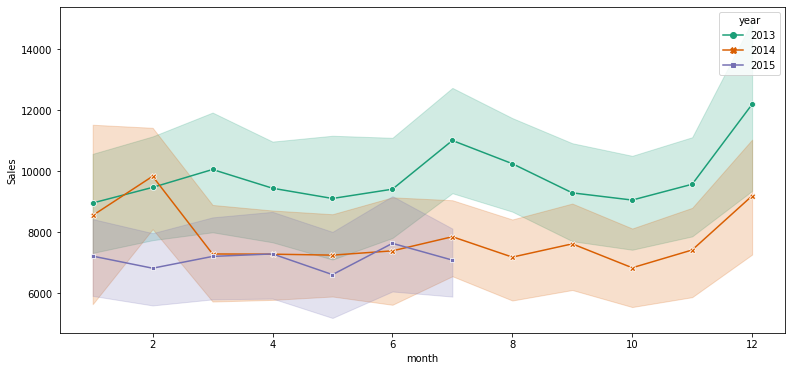

In [ ]:
competition_impact(store_details.head(1))

**Observation:** *Store (with ID:983) seems to have made good sales in 2013 but once a competitor has started in March 2014, sales have started reducing from the next month.*

***Competitor has started in the far-off***

 Store  CompetitionOpenSinceYear  CompetitionOpenSinceMonth  CompetitionDistance
   318                    2014.0                        3.0              32330.0


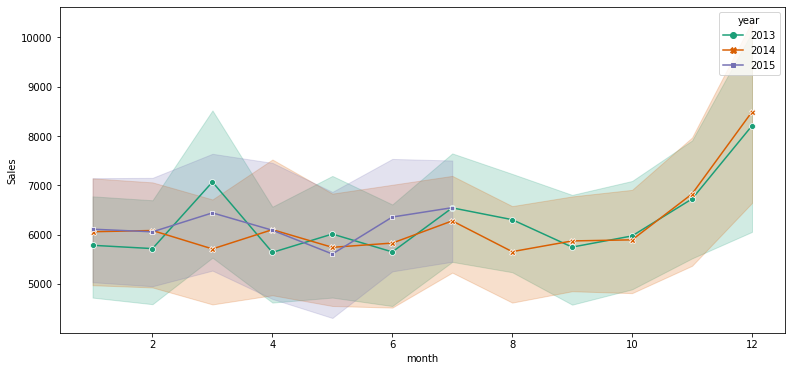

In [ ]:
competition_impact(store_details.tail(1))

**Observation:** *Competitor's impact is more on the business when it is started in the proximity, otherwise it is not that huge.*

##Correlation

In [ ]:
train_data_cor = pd.merge(train_data_copy,store_data,how='left')

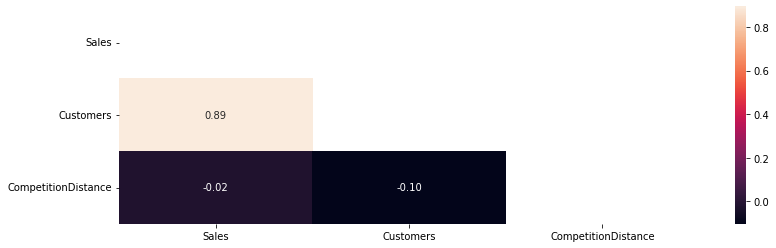

In [49]:
plt.figure(figsize=(13,4))
correlation = train_store_data[['Sales','Customers','CompetitionDistance']].corr()
matrix = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,annot=True,mask=matrix,fmt='.2f') # cmap=BuPu
plt.show()

**Observation:** 
* *Sales and customers are highly correlated.*

###Categorical Features

*As Pearson coefficient would not work for finding correlation between categorical variables, we are going to use Cramer's V technique to find the correlation.*

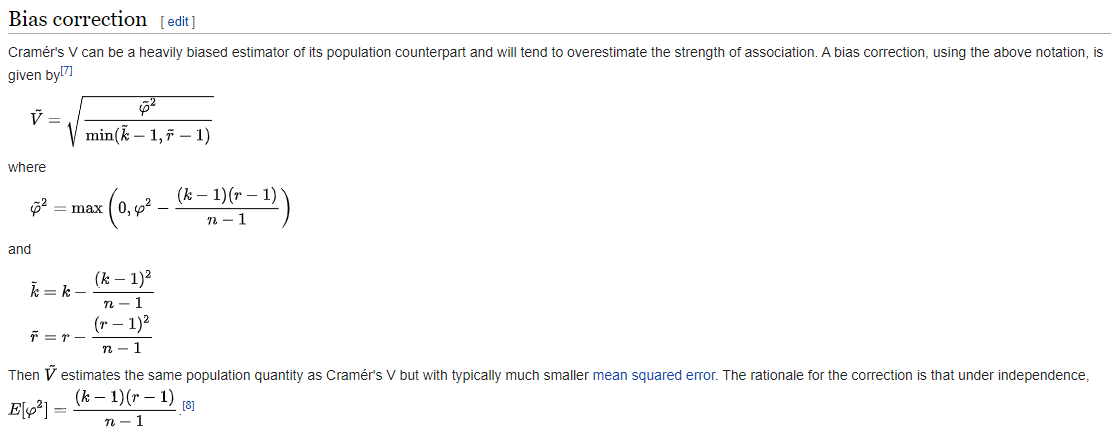

In [ ]:
# Find Correlation between categorical variables : 
#Refer 
# 1. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# 2. https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab
# 3. https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
# 4. https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# http://www.ce.memphis.edu/7012/L17_CategoricalVariableAssociation.pdf
# https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V#Bias_correction
# https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
import scipy.stats as ss
def cramersv(x,y):
    confusion_matrix = pd.crosstab(x,y)#.values
    chi2 = ss.chi2_contingency(confusion_matrix)[0] #test statistic
    # Chi-square test of independence of variables in a contingency table.
    n = confusion_matrix.sum().sum() # sum of all
    phi2 = chi2/n 
    r,k = confusion_matrix.shape # (2,7)
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

*Let's find the correlation between two categorical variables.*

In [ ]:
print(cramersv(train_store_data['Sales'],train_store_data['DayOfWeek']))
print(cramersv(train_store_data['Sales'],train_store_data['Promo']))
print(cramersv(train_store_data['Sales'],train_store_data['StoreType']))
print(cramersv(train_store_data['Sales'],train_store_data['Assortment']))
print(cramersv(train_store_data['Customers'],train_store_data['DayOfWeek']))#Customers
print(cramersv(train_store_data['Customers'],train_store_data['Promo']))
print(cramersv(train_store_data['Customers'],train_store_data['StoreType']))
print(cramersv(train_store_data['Customers'],train_store_data['Assortment']))
print(cramersv(train_store_data['Customers'],train_store_data['CompetitionDistance']))
print(cramersv(train_store_data['Sales'],train_store_data['CompetitionDistance']))

0.3758861829784428
0.4872551535791993
0.1831366765196839
0.14531527497174498
0.37259697388985724
0.3914833522795861
0.3514329549575368
0.32784865329899543
0.03968215492874689
0.0


*Prepare the Dataframe so as to use it for correlation heatmap generation*

In [ ]:
categorical_features = ['Open','Promo','StateHoliday','SchoolHoliday','Promo2','StoreType', 'Assortment','PromoInterval']#,'Sales','Customers','CompetitionDistance'
category_wise_score = []
for row in categorical_features:
    score_list = []
    for col in categorical_features:
        score = cramersv(train_store_data[row],train_store_data[col])
        score_list.append(score)
    category_wise_score.append(score_list)
di = {category: category_wise_score[idx] for idx,category in enumerate(categorical_features)}
correlation_df = pd.DataFrame(di)
correlation_df.set_index(correlation_df.columns,inplace=True)

In [ ]:
correlation_df

Open  DayOfWeek     Promo  StateHoliday  SchoolHoliday  \
Open           0.999997   0.875510  0.295038      0.378369       0.086162   
DayOfWeek      0.875510   1.000000  0.495336      0.154274       0.263504   
Promo          0.295038   0.495336  0.999998      0.012307       0.067473   
StateHoliday   0.378369   0.154274  0.012307      0.999983       0.148640   
SchoolHoliday  0.086162   0.263504  0.067473      0.148640       0.999997   
Promo2         0.008247   0.000000  0.000000      0.008871       0.006834   
StoreType      0.051286   0.000000  0.000000      0.003151       0.001790   
Assortment     0.038703   0.000000  0.000000      0.002427       0.002196   
PromoInterval  0.000000   0.000000  0.000000      0.004500       0.000000   

                 Promo2  StoreType  Assortment  PromoInterval  
Open           0.008247   0.051286    0.038703       0.000000  
DayOfWeek      0.000000   0.000000    0.000000       0.000000  
Promo          0.000000   0.000000    0.000000       0.000000  
StateHoliday   0.008871   0.003151    0.002427       0.004500  
SchoolHoliday  0.006834   0.001790    0.002196       0.000000  
Promo2         0.999998   0.106075    0.014861            NaN  
StoreType      0.106075   1.000000    0.537412       0.071728  
Assortment     0.014861   0.537412    1.000000       0.086027  
PromoInterval       NaN   0.071728    0.086027       1.000000

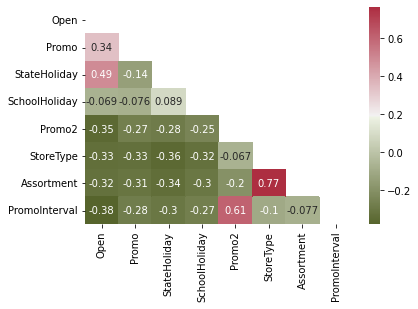

In [ ]:
corr = correlation_df.corr()
matrix = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
sns.heatmap(corr,annot=True,mask=matrix,cmap=cmap)
plt.show()
# How to plot only the lower triangle of a seaborn heatmap? : https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

**Observation:**
* *Promo2 and PromoInterval are correlated. This could be because they are inter related.*
* *Storetype and Assortment are highly correlated. This might be because categories in both features assortment (A,B,C) and storetypes (A,B,C,D) are almost same. But can't confirm on how correlated they are. I guess same is the case with Open and StateHoliday.*

#Observations from Exploratory Data Analysis



1.   *Promotional offers*

*   *No promotional offers during first and last week of the year.*
*  *First and third weeks of every month saw an increase in number of promotions offered.*
*   *Promotional offers helped in improving the sales and drawing in more customers, yet they were offered only on weekdays.*
* *Promotional offers seems to be more fruitful on Mondays.*
* *Promotional offers helped in the improved sales of all the store types and assortment types but its impact is comparatively small for B store type and B assortment which leads us to assume that B store type and B assortment stores sold necessary items that customers would purchase irrespective of promotions.*
*  *Unlike promo1, promo2 is offered quite regularly and its impact is quite less.*
*  *Unlike promo1, promo2s are offered unevenly by store types, a bit less by B assortment and B store type.* 


2.   *Days, Weeks, Quarter*

*   *30th and 31 st day of the month saw huge sales and crowd and it saw a dip on 1st of the next month.*
*   *Mondays are great for stores as it saw good crowd and sales, must be because of the fact that stores are closed on sundays.*
*   *51 st week of the year saw huge sales and crowd. 52nd week saw dip in the sales and crowd because most stores are closed during that week.*
*   *October-December quarter sees a huge increase in sales in 2013, 2014 owing to the festival season.*
*  *As the data contains 2 years and 7 months of information, it is better to do the analysis based on the 'days of the month' instead of week/month/quarter as the Aug-Dec timeperiod will have a disadvantage in terms of number of records in the data.*

3. *State holidays and School holidays*
* *Most of the stores are closed on state holidays unlike school holidays.*
* *In the 942 days, 36 state holidays are observed and there was not a state holiday which is observed by all the 1115 stores. Also from the above analysis, the store that observed a state holiday in one year need not observe the same state holiday in the next year.*
* *In the 942 days, 201 school holidays are observed and there was not one school holiday which is observed by all the 1115 stores. Unlike state holidays, school holidays are many yet hardly observed by many.*
* *Stores offer more promotional offers on school holidays than on state holidays might be because more stores remain closed on state holiday compared to a school holiday. Also we should remember that the number of school holidays is relatively higher than the state holidays.*
*  *School Holidays seems to bring in more customers than State holidays, could be because most of the stores are closed on a state holiday.*
* *10 stores are running open throughout the 942 days without holidays and all these are of the same store type B.*

4.  *From the correlation matrix and various other graphs plotted,*
* *We can conclude that sales are highly correlated with customers.*

5.  *Types of Stores*
* *C store type stores never stayed Open on any sunday in 2 years and 7 months.*
* *'B' store type and 'B' assortment seem to be selling critical products that they are almost never closed(>98%) on sundays and such stores are comparatively less in the data, yet they attracted more crowd eventually more sales.*
* *Though the number of B assortments and B store types are small compared to others, all store types and assortment types offered equal percentage of promo1s.*
* *Assortment B seems to co exist only with store type B.*

6.  *Competition Distance*
*  *Stores which have competitors near by struggled to keep up with sales of the past after the competitor has started.*
* *Stores which have competitors far off did not seem to have a huge impact on their business even after competition.*
* *Assortment B and storetype B have more competitors near by compared to others.*
7. *Other Insights from the data*
* *There are 181 out of 1115 stores for which we have less than 942 days of data.*
* *There are 54 stores that registered Zero sales even when they are open. Some stores with IDs 25, 28, 339, 364, 665,835, 983, 1017, 1039, 1100 did not make any sales for 2 consecutive opened days.*(storetype/assortment)
  





##Missing values Check

In [50]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
day              0
dayOfYear        0
week             0
month            0
quarter          0
year             0
dtype: int64

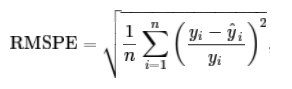

*As records with zero sales will result in infinite RMSPE, remove records that have sales as zero when the stores are open/closed.*

In [51]:
print(train_data[train_data['Open']=='No']['Sales'].value_counts())
# out of 1017209 records

0    172817
Name: Sales, dtype: int64


**Observation:** It is obvious that when the Stores are closed we noticed that there are no Sales. Lets remove the records where Stores are closed.

In [52]:
dummy = train_data[(train_data['Open']=='Yes') & (train_data['Sales']==0)]
dummy.shape

(54, 15)

**Observation:** There are 54 stores which made 0 sales even when they are not closed.

In [53]:
train_data = train_data[(train_data['Open']=='Yes') & (train_data['Sales']!=0)]
print(train_data.shape)
# out of 1017209 records
train_data.head()

(844338, 15)


Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1       Fri 2015-07-31   5263        555  Yes   Yes           No   
1      2       Fri 2015-07-31   6064        625  Yes   Yes           No   
2      3       Fri 2015-07-31   8314        821  Yes   Yes           No   
3      4       Fri 2015-07-31  13995       1498  Yes   Yes           No   
4      5       Fri 2015-07-31   4822        559  Yes   Yes           No   

  SchoolHoliday  day  dayOfYear  week  month  quarter  year  
0           Yes   31        212    31      7        3  2015  
1           Yes   31        212    31      7        3  2015  
2           Yes   31        212    31      7        3  2015  
3           Yes   31        212    31      7        3  2015  
4           Yes   31        212    31      7        3  2015

**Observation:** *We have taken the records for the stores which remained Open and also  made sales.*

In [56]:
train_data.shape

(844338, 15)

In [54]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [57]:
store_data['CompetitionOpenSinceYear'].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

In [58]:
store_data['Promo2'].value_counts()

Yes    571
No     544
Name: Promo2, dtype: int64

**Observation:** *544 stores don't offer 'Promo' so there will be no value in 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval' for those stores. So we can fill this missing values with 0*

##Imputation

**CompetitionDistance**

In [59]:
store_data[pd.isna(store_data['CompetitionOpenSinceMonth'])]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear Promo2  \
11                          NaN                       NaN    Yes   
12                          NaN                       NaN    Yes   
15                          NaN                       NaN     No   
18                          NaN                       NaN    Yes   
21                          NaN                       NaN    Yes   
...                         ...                       ...    ...   
1095                        NaN                       NaN    Yes   
1099                        NaN                       NaN    Yes   
1112                        NaN                       NaN     No   
1113                        NaN                       NaN     No   
1114                        NaN                       NaN    Yes   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

In [60]:
store_data[pd.isna(store_data['CompetitionDistance'])]
# https://pandas.pydata.org/docs/reference/api/pandas.isnull.html : Detect missing values for an array-like object.

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear Promo2  \
290                        NaN                       NaN     No   
621                        NaN                       NaN     No   
878                        NaN                       NaN    Yes   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

3 Stores that have missing CompetitionDistance also have missing CompetitionOpenSinceYear/Month, this makes us assume that there is no competition, but there are 351 other stores which has CompetitionDistance despite of missing CompetitionOpenSinceYear/Month. So this must be because of some problem in data collection. [Kaggle Discussion](https://www.kaggle.com/c/rossmann-store-sales/discussion/16866)


*As for the stores listed with competition distance but no opening date, that data is currently not available to us.
However not all distances are considered to consititue the presence of any noticable competition.
e.g. a distance of 5000m is relevant in rural areas but almost completely irrelevant for dense urban areas (with the exception of shopping centers, of course).- Competition Host* 

In [61]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)

**Observation:** 3 missing CompetitionDistance values are replaced with median of CompetitionDistance.

In [63]:
store_data['Promo2'].value_counts()

Yes    571
No     544
Name: Promo2, dtype: int64

**Observation:** Notice that for 544 stores there are no Promo2s. Obviously the corresponding features Promo2SinceYear, Promo2SinceWeek are Nans. Lets replace them with 0. If no Promo2, there will be no value of when it started.

In [62]:
store_data.fillna(0, inplace=True)
store_data.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0     No              0.0              0.0   
1                    2007.0    Yes             13.0           2010.0   
2                    2006.0    Yes             14.0           2011.0   
3                    2009.0     No              0.0              0.0   
4                    2015.0     No              0.0              0.0   

     PromoInterval  
0                0  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3                0  
4                0

In [ ]:
# https://datascience.stackexchange.com/questions/90347/calculating-correlation-for-categorical-variables
# https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab
# https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26

*Let's have everything in one dataframe*

In [64]:
preprocessed_data = pd.merge(train_data,store_data,how='left',on='Store')
preprocessed_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1       Fri 2015-07-31   5263        555  Yes   Yes           No   
1      2       Fri 2015-07-31   6064        625  Yes   Yes           No   
2      3       Fri 2015-07-31   8314        821  Yes   Yes           No   
3      4       Fri 2015-07-31  13995       1498  Yes   Yes           No   
4      5       Fri 2015-07-31   4822        559  Yes   Yes           No   

  SchoolHoliday  day  ...  year  StoreType  Assortment  CompetitionDistance  \
0           Yes   31  ...  2015          c           a               1270.0   
1           Yes   31  ...  2015          a           a                570.0   
2           Yes   31  ...  2015          a           a              14130.0   
3           Yes   31  ...  2015          c           c                620.0   
4           Yes   31  ...  2015          a           a              29910.0   

   CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  Promo2SinceWeek  \
0                        9.0                   2008.0     No              0.0   
1                       11.0                   2007.0    Yes             13.0   
2                       12.0                   2006.0    Yes             14.0   
3                        9.0                   2009.0     No              0.0   
4                        4.0                   2015.0     No              0.0   

   Promo2SinceYear    PromoInterval  
0              0.0                0  
1           2010.0  Jan,Apr,Jul,Oct  
2           2011.0  Jan,Apr,Jul,Oct  
3              0.0                0  
4              0.0                0  

[5 rows x 24 columns]

In [65]:
preprocessed_data.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
day                          0
dayOfYear                    0
week                         0
month                        0
quarter                      0
year                         0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

*With this we wrapped up*
* *Exploratory Data Analysis*
* *Imputation*